# Analyze data from educational systems

### Context
EdTech, a start-up called academy that which offers online training content for high school and university students, wants to do an international expansion project. As a Data Scientist in the company, my role on this project is to perform an initial exploratory analysis to answer the following questions: 

  - What are the countries with high client potential for our services?
  - For each of these countries, how will this customer potential evolve?
  - In which countries should the company focus its efforts?
  
#### Mission

  - Perform an initial exploratory analysis to determine whether the World Bank’s education data can inform the expansion project to new countries 

  - Provide insights into the data and suggest potential countries of interests
  
#### Source of data
  - https://datacatalog.worldbank.org/search/dataset/0038480

### 1.0 Python libraries and datasets

##### Importation of python libraries 

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#allow plot to appear within the notebook
%matplotlib inline 

### 2.0 Data source and details
The five CSV data files used in this project are World Bank Education data made available by the OpenClassroms. They are public datasets and can be downloaded directly from the World Bank website via https://datacatalog.worldbank.org/dataset/education-statistics. 

##### Loading of datasets and creation of dataframes

In [2]:
Country = pd.read_csv('D:/OC/P2/EdStatsCountry.csv')
Data = pd.read_csv('D:/OC/P2/EdStatsData.csv')
Country_Series = pd.read_csv('D:/OC/P2/EdStatsCountry-Series.csv')
Series = pd.read_csv('D:/OC/P2/EdStatsSeries.csv')
FootNote = pd.read_csv('D:/OC/P2/EdStatsFootNote.csv')

In [3]:
# Presentation of the first 5 lines of the EdStatsCountry datafile
Country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [4]:
# Presentation of the first 5 lines of the EdStatsData datafile
Data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [5]:
# Presentation of the first 5 lines of the EdStatsCountry-Series datafile
Country_Series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [6]:
# Presentation of the first 5 lines of the EdStatsSeries datafile
Series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [7]:
#Presentation of the first 5 lines of the EdStatsFootNote data
FootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

### 3.0 Pre-exploratory analysis
#### 3.1. Data quality check
##### 3.1.1 . Checking for missing values

In [8]:
Country.isna().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [9]:
Data.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [10]:
Country_Series.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [11]:
Series.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [12]:
FootNote.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

##### 3.1.2. Checking for duplicated variables

In [13]:
Country.duplicated(['Country Code', 'Region']).sum()

0

In [14]:
Data.duplicated(['Country Name', 'Indicator Name']).sum()

0

In [15]:
Country_Series.duplicated(['CountryCode', 'SeriesCode']).sum()

0

In [16]:
Series.duplicated(['Series Code', 'Indicator Name']).sum()

0

In [17]:
FootNote.duplicated(['CountryCode', 'SeriesCode', 'Year']).sum()

0

#### Narratives: 
- There are thousands of missing values but no duplicates in all the datasets

##### 3.1.3. Data counts - number of rows and columns

In [18]:
Country.shape

(241, 32)

In [19]:
Data.shape

(886930, 70)

In [20]:
Country_Series.shape

(613, 4)

In [21]:
Series.shape

(3665, 21)

In [22]:
FootNote.shape

(643638, 5)

##### 3.1.4. Columns data types

In [23]:
Country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [24]:
Data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [25]:
Country_Series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [26]:
Series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [27]:
FootNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

#### 3.2. Selection of relevant columns, data filtering, and transformation of dataFrames

##### 3.2.1. Selection of relevant columns

Based on the data types, I selected a few columns only in the Country (Country Code and Region) and Data files while the remaining - Country_Series, Series, and FootNote files were only used as supporting files to achive the objectives of the project   

In [28]:
# Column selection and creation of sub-dataframe from the Country file
Country_df = Country[['Country Code','Region']] #new sub-dataframe

In [29]:
Country_df #new sub-dataframe

Country Code                      Region
0            ABW   Latin America & Caribbean
1            AFG                  South Asia
2            AGO          Sub-Saharan Africa
3            ALB       Europe & Central Asia
4            AND       Europe & Central Asia
..           ...                         ...
236          XKX       Europe & Central Asia
237          YEM  Middle East & North Africa
238          ZAF          Sub-Saharan Africa
239          ZMB          Sub-Saharan Africa
240          ZWE          Sub-Saharan Africa

[241 rows x 2 columns]

In [30]:
# Preliminary filtering of the Data file data set to check for NAN, delete less important columns and reduce size of dataframe
(Data.isna().sum()/Data.shape[0]).sort_values(ascending=True)

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.726650
                    ...   
1973              0.959924
1971              0.959933
2016              0.981442
2017              0.999839
Unnamed: 69       1.000000
Length: 70, dtype: float64

Remove columns with more than 80% NaN missing values

In [31]:
# Column selection and creation of sub-dataframe from the Data file
# Preliminary filtering of the data set remove columns with more than 90% NaN threshold

Data[Data.columns[Data.isna().sum()/len(Data) <0.8]] 

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       2005       2010  
0                 UIS.NERA.2        NaN        NaN  
1               UIS.NERA.2.F        NaN        NaN  
2             UIS.NERA.2.GPI        NaN        NaN  
3               UIS.NERA.2.M        NaN        NaN  
4                SE.PRM.TENR  82.489487  85.211998  
...                      ...        ...        ...  
886925      UIS.LP.AG15T24.M        NaN        NaN  
886926     SE.ADT.1524.LT.ZS        NaN        NaN  
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN  
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN  
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN  

[886930 rows x 6 columns]

Select only recent data - data from 2000 to 2015

In [32]:
# Create a new sub-dataframe for the Data file. New columns for the data file - select data from 2000 to 2015 based on percentage of NaN and age of data

Columns_data = ['Country Name','Country Code','Indicator Name','2000','2001','2002','2003',
             '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

Data_df = Data[Columns_data]

In [33]:
 # New dataframe for the Data file
Data_df

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name       2000  \
0       Adjusted net enrolment rate, lower secondary, ...        NaN   
1       Adjusted net enrolment rate, lower secondary, ...        NaN   
2       Adjusted net enrolment rate, lower secondary, ...        NaN   
3       Adjusted net enrolment rate, lower secondary, ...        NaN   
4       Adjusted net enrolment rate, primary, both sex...  77.245682   
...                                                   ...        ...   
886925  Youth illiterate population, 15-24 years, male...        NaN   
886926  Youth literacy rate, population 15-24 years, b...        NaN   
886927  Youth literacy rate, population 15-24 years, f...        NaN   
886928  Youth literacy rate, population 15-24 years, g...        NaN   
886929  Youth literacy rate, population 15-24 years, m...        NaN   

             2001       2002       2003       2004       2005       2006  \
0             NaN        NaN        NaN        NaN        NaN        NaN   
1             NaN        NaN        NaN        NaN        NaN        NaN   
2             NaN        NaN        NaN        NaN        NaN        NaN   
3             NaN        NaN        NaN        NaN        NaN        NaN   
4       78.800522  80.051399  80.805389  81.607063  82.489487  82.685509   
...           ...        ...        ...        ...        ...        ...   
886925        NaN        NaN        NaN        NaN        NaN        NaN   
886926        NaN        NaN        NaN        NaN        NaN        NaN   
886927        NaN        NaN        NaN        NaN        NaN        NaN   
886928        NaN        NaN        NaN        NaN        NaN        NaN   
886929        NaN        NaN        NaN        NaN        NaN        NaN   

             2007       2008       2009       2010          2011       2012  \
0             NaN        NaN        NaN        NaN           NaN        NaN   
1             NaN        NaN        NaN        NaN           NaN        NaN   
2             NaN        NaN        NaN        NaN           NaN        NaN   
3             NaN        NaN        NaN        NaN           NaN        NaN   
4       83.280342  84.011871  84.195961  85.211998      85.24514  86.101669   
...           ...        ...        ...        ...           ...        ...   
886925        NaN        NaN        NaN        NaN  166679.00000        NaN   
886926        NaN        NaN        NaN        NaN      90.93070        NaN   
886927        NaN        NaN        NaN        NaN      92.12456        NaN   
886928        NaN        NaN        NaN        NaN       1.02828        NaN   
886929        NaN        NaN        NaN        NaN      89.59058        NaN   

            2013           2014  2015  
0            NaN            NaN   NaN  
1            NaN            NaN   NaN  
2            NaN            NaN   NaN  
3            NaN            NaN   NaN  
4       85.51194      85.320152   NaN  
...          ...            ...   ...  
886925       NaN  199464.000000   NaN  
886926       NaN      90.428120   NaN  
886927       NaN      93.188350   NaN  
886928       NaN       1.063890   NaN  
886929       NaN      87.591860   NaN  

[886930 rows x 19 columns]

In [34]:
#Transform the Year columns to rows

Data_df_melt = Data_df.melt(id_vars = ["Country Name","Country Code","Indicator Name"],
                     var_name = "Year",
                     value_name = 'Value')
Data_df_melt

Country Name Country Code  \
0          Arab World          ARB   
1          Arab World          ARB   
2          Arab World          ARB   
3          Arab World          ARB   
4          Arab World          ARB   
...               ...          ...   
14190875     Zimbabwe          ZWE   
14190876     Zimbabwe          ZWE   
14190877     Zimbabwe          ZWE   
14190878     Zimbabwe          ZWE   
14190879     Zimbabwe          ZWE   

                                             Indicator Name  Year      Value  
0         Adjusted net enrolment rate, lower secondary, ...  2000        NaN  
1         Adjusted net enrolment rate, lower secondary, ...  2000        NaN  
2         Adjusted net enrolment rate, lower secondary, ...  2000        NaN  
3         Adjusted net enrolment rate, lower secondary, ...  2000        NaN  
4         Adjusted net enrolment rate, primary, both sex...  2000  77.245682  
...                                                     ...   ...        ...  
14190875  Youth illiterate population, 15-24 years, male...  2015        NaN  
14190876  Youth literacy rate, population 15-24 years, b...  2015        NaN  
14190877  Youth literacy rate, population 15-24 years, f...  2015        NaN  
14190878  Youth literacy rate, population 15-24 years, g...  2015        NaN  
14190879  Youth literacy rate, population 15-24 years, m...  2015        NaN  

[14190880 rows x 5 columns]

##### 3.2.2. selection of indicators (filtering)

In [35]:
# View all indicators

Indicators = Data_df_melt.groupby("Indicator Name").count()

In [36]:
Indicators

Country Name  \
Indicator Name                                                     
Adjusted net enrolment rate, lower secondary, b...          3872   
Adjusted net enrolment rate, lower secondary, f...          3872   
Adjusted net enrolment rate, lower secondary, g...          3872   
Adjusted net enrolment rate, lower secondary, m...          3872   
Adjusted net enrolment rate, primary, both sexe...          3872   
...                                                          ...   
Youth illiterate population, 15-24 years, male ...          3872   
Youth literacy rate, population 15-24 years, bo...          3872   
Youth literacy rate, population 15-24 years, fe...          3872   
Youth literacy rate, population 15-24 years, ge...          3872   
Youth literacy rate, population 15-24 years, ma...          3872   

                                                    Country Code  Year  Value  
Indicator Name                                                                 
Adjusted net enrolment rate, lower secondary, b...          3872  3872   1515  
Adjusted net enrolment rate, lower secondary, f...          3872  3872   1472  
Adjusted net enrolment rate, lower secondary, g...          3872  3872   1472  
Adjusted net enrolment rate, lower secondary, m...          3872  3872   1472  
Adjusted net enrolment rate, primary, both sexe...          3872  3872   2417  
...                                                          ...   ...    ...  
Youth illiterate population, 15-24 years, male ...          3872  3872    691  
Youth literacy rate, population 15-24 years, bo...          3872  3872    802  
Youth literacy rate, population 15-24 years, fe...          3872  3872    802  
Youth literacy rate, population 15-24 years, ge...          3872  3872    802  
Youth literacy rate, population 15-24 years, ma...          3872  3872    802  

[3665 rows x 4 columns]

In [37]:
#Indicators.to_excel("Indicators.xlsx") #Indicators exported to excel file and manually selected to make a list

In [38]:
# Create list of indicators
Indicator_List = ['Internet users (per 100 people)', 'Personal computers (per 100 people)',
                       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
                       'Enrolment in upper secondary general, both sexes (number)',
                  'GDP per capita (current US$)',
                  'Government expenditure on education as % of GDP (%)',
                  'Gross enrolment ratio, secondary, both sexes (%)',
                  'Gross enrolment ratio, tertiary, both sexes (%)',
                  'Percentage of enrolment in tertiary education in private institutions (%)',
                  'Youth literacy rate, population 15-24 years, male (%)',
                  'Percentage of enrolment in upper secondary education in private institutions (%)',
                    'Population, ages 15-24, total','Population growth (annual %)']

In [39]:
#Data filtering - create a dataframe containing on the selected indicators
Data_df_filt = Data_df_melt.loc[Data_df_melt['Indicator Name'].isin(Indicator_List)]

In [40]:
#Display the new dataframe of only the selected indicators
Data_df_filt 

Country Name Country Code  \
1201       Arab World          ARB   
1220       Arab World          ARB   
1245       Arab World          ARB   
1260       Arab World          ARB   
1335       Arab World          ARB   
...               ...          ...   
14189073     Zimbabwe          ZWE   
14189299     Zimbabwe          ZWE   
14189522     Zimbabwe          ZWE   
14189697     Zimbabwe          ZWE   
14190879     Zimbabwe          ZWE   

                                             Indicator Name  Year  \
1201      Enrolment in tertiary education per 100,000 in...  2000   
1220      Enrolment in upper secondary general, both sex...  2000   
1245                           GDP per capita (current US$)  2000   
1260      Government expenditure on education as % of GD...  2000   
1335       Gross enrolment ratio, secondary, both sexes (%)  2000   
...                                                     ...   ...   
14189073  Percentage of enrolment in upper secondary edu...  2015   
14189299                Personal computers (per 100 people)  2015   
14189522                       Population growth (annual %)  2015   
14189697                      Population, ages 15-24, total  2015   
14190879  Youth literacy rate, population 15-24 years, m...  2015   

                 Value  
1201               NaN  
1220      5.656668e+06  
1245      2.615683e+03  
1260               NaN  
1335      5.974518e+01  
...                ...  
14189073           NaN  
14189299           NaN  
14189522  2.345643e+00  
14189697  3.333716e+06  
14190879           NaN  

[50336 rows x 5 columns]

##### 3.2.3. Combining and manipulation of dataframes

In [41]:
# combine the Country and Data DataFrames
DF_merge = pd.merge(Data_df_filt, Country_df, on = 'Country Code') 

In [42]:
DF_merge = DF_merge.drop(columns = 'Country Code')

In [43]:
DF_merge=DF_merge.sort_values(['Country Name', 'Year'], ascending=True)

In [44]:
DF_merge

Country Name                                     Indicator Name  Year  \
5200   Afghanistan  Enrolment in tertiary education per 100,000 in...  2000   
5201   Afghanistan  Enrolment in upper secondary general, both sex...  2000   
5202   Afghanistan                       GDP per capita (current US$)  2000   
5203   Afghanistan  Government expenditure on education as % of GD...  2000   
5204   Afghanistan   Gross enrolment ratio, secondary, both sexes (%)  2000   
...            ...                                                ...   ...   
50123     Zimbabwe  Percentage of enrolment in upper secondary edu...  2015   
50124     Zimbabwe                Personal computers (per 100 people)  2015   
50125     Zimbabwe                       Population growth (annual %)  2015   
50126     Zimbabwe                      Population, ages 15-24, total  2015   
50127     Zimbabwe  Youth literacy rate, population 15-24 years, m...  2015   

              Value              Region  
5200            NaN          South Asia  
5201            NaN          South Asia  
5202            NaN          South Asia  
5203            NaN          South Asia  
5204            NaN          South Asia  
...             ...                 ...  
50123           NaN  Sub-Saharan Africa  
50124           NaN  Sub-Saharan Africa  
50125  2.345643e+00  Sub-Saharan Africa  
50126  3.333716e+06  Sub-Saharan Africa  
50127           NaN  Sub-Saharan Africa  

[50128 rows x 5 columns]

In [45]:
#Create list of the countries
Country_List = DF_merge["Country Name"].unique().tolist()

In [46]:
# pivot data to transform the indicators to columns
DF_pivot = DF_merge.pivot(index= ['Country Name','Year','Region'], columns='Indicator Name', values = 'Value')

#### 3.3. Handling of missing values 

In [47]:
# display the number of NaN values in each indicator as percentage of total NaN in the dataframe
DF_pivot.isna().sum()/len(DF_pivot) 

Indicator Name
Enrolment in tertiary education per 100,000 inhabitants, both sexes                 0.505965
Enrolment in upper secondary general, both sexes (number)                           0.282417
GDP per capita (current US$)                                                        0.061722
Government expenditure on education as % of GDP (%)                                 0.534751
Gross enrolment ratio, secondary, both sexes (%)                                    0.305239
Gross enrolment ratio, tertiary, both sexes (%)                                     0.379668
Internet users (per 100 people)                                                     0.068983
Percentage of enrolment in tertiary education in private institutions (%)           0.630187
Percentage of enrolment in upper secondary education in private institutions (%)    0.553683
Personal computers (per 100 people)                                                 0.637189
Population growth (annual %)                           

In [48]:
# Looping and forward filling of the NaN

for country in Country_List:
    DF_pivot.loc[country].fillna(method = 'ffill', inplace=True)
    DF_pivot.loc[country].fillna(method = 'bfill', inplace=True)

In [49]:
DF_pivot

Indicator Name                        Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
Country Name Year Region                                                                                    
Afghanistan  2000 South Asia                                                 116.455200                     
             2001 South Asia                                                 116.455200                     
             2002 South Asia                                                 116.455200                     
             2003 South Asia                                                 116.455200                     
             2004 South Asia                                                 117.651810                     
...                                                                                 ...                     
Zimbabwe     2011 Sub-Saharan Africa                                         654.374817                     
             2012 Sub-Saharan Africa                                         645.443787                     
             2013 Sub-Saharan Africa                                         631.725220                     
             2014 Sub-Saharan Africa                                         631.725220                     
             2015 Sub-Saharan Africa                                         631.725220                     

Indicator Name                        Enrolment in upper secondary general, both sexes (number)  \
Country Name Year Region                                                                          
Afghanistan  2000 South Asia                                                   159952.0           
             2001 South Asia                                                   159952.0           
             2002 South Asia                                                   107733.0           
             2003 South Asia                                                   113690.0           
             2004 South Asia                                                   170591.0           
...                                                                                 ...           
Zimbabwe     2011 Sub-Saharan Africa                                           371546.0           
             2012 Sub-Saharan Africa                                           481006.0           
             2013 Sub-Saharan Africa                                           490522.0           
             2014 Sub-Saharan Africa                                           490522.0           
             2015 Sub-Saharan Africa                                           490522.0           

Indicator Name                        GDP per capita (current US$)  \
Country Name Year Region                                             
Afghanistan  2000 South Asia                            117.409691   
             2001 South Asia                            117.409691   
             2002 South Asia                            187.845095   
             2003 South Asia                            198.728544   
             2004 South Asia                            219.141353   
...                                                            ...   
Zimbabwe     2011 Sub-Saharan Africa                    840.949880   
             2012 Sub-Saharan Africa                    968.163871   
             2013 Sub-Saharan Africa                   1026.388289   
             2014 Sub-Saharan Africa                   1031.104616   
             2015 Sub-Saharan Africa                   1033.415842   

Indicator Name                        Government expenditure on education as % of GDP (%)  \
Country Name Year Region                                                                    
Afghanistan  2000 South Asia                                                    3.46149     
             2001 South Asia                                                    3.46149     
           

In [50]:
# Verification of the number of NaN left in each indicator after filling

DF_pivot.isna().sum()

Indicator Name
Enrolment in tertiary education per 100,000 inhabitants, both sexes                  896
Enrolment in upper secondary general, both sexes (number)                            224
GDP per capita (current US$)                                                         112
Government expenditure on education as % of GDP (%)                                  944
Gross enrolment ratio, secondary, both sexes (%)                                     400
Gross enrolment ratio, tertiary, both sexes (%)                                      512
Internet users (per 100 people)                                                      176
Percentage of enrolment in tertiary education in private institutions (%)           1248
Percentage of enrolment in upper secondary education in private institutions (%)     880
Personal computers (per 100 people)                                                  400
Population growth (annual %)                                                          16
Popula

In [51]:
# Drop columns/indicators with >0.3 (30% NaN) to reduce amount of NaN

DF_pivot = DF_pivot[DF_pivot.columns[DF_pivot.isna().sum()/len(DF_pivot) <0.3]]

In [52]:
# Drop the remaining NaN in the dataframe

Final_df=DF_pivot.dropna()

In [53]:
# Final cleaned dataframe
Final_df 

Indicator Name                        Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
Country Name Year Region                                                                                    
Afghanistan  2000 South Asia                                                 116.455200                     
             2001 South Asia                                                 116.455200                     
             2002 South Asia                                                 116.455200                     
             2003 South Asia                                                 116.455200                     
             2004 South Asia                                                 117.651810                     
...                                                                                 ...                     
Zimbabwe     2011 Sub-Saharan Africa                                         654.374817                     
             2012 Sub-Saharan Africa                                         645.443787                     
             2013 Sub-Saharan Africa                                         631.725220                     
             2014 Sub-Saharan Africa                                         631.725220                     
             2015 Sub-Saharan Africa                                         631.725220                     

Indicator Name                        Enrolment in upper secondary general, both sexes (number)  \
Country Name Year Region                                                                          
Afghanistan  2000 South Asia                                                   159952.0           
             2001 South Asia                                                   159952.0           
             2002 South Asia                                                   107733.0           
             2003 South Asia                                                   113690.0           
             2004 South Asia                                                   170591.0           
...                                                                                 ...           
Zimbabwe     2011 Sub-Saharan Africa                                           371546.0           
             2012 Sub-Saharan Africa                                           481006.0           
             2013 Sub-Saharan Africa                                           490522.0           
             2014 Sub-Saharan Africa                                           490522.0           
             2015 Sub-Saharan Africa                                           490522.0           

Indicator Name                        GDP per capita (current US$)  \
Country Name Year Region                                             
Afghanistan  2000 South Asia                            117.409691   
             2001 South Asia                            117.409691   
             2002 South Asia                            187.845095   
             2003 South Asia                            198.728544   
             2004 South Asia                            219.141353   
...                                                            ...   
Zimbabwe     2011 Sub-Saharan Africa                    840.949880   
             2012 Sub-Saharan Africa                    968.163871   
             2013 Sub-Saharan Africa                   1026.388289   
             2014 Sub-Saharan Africa                   1031.104616   
             2015 Sub-Saharan Africa                   1033.415842   

Indicator Name                        Government expenditure on education as % of GDP (%)  \
Country Name Year Region                                                                    
Afghanistan  2000 South Asia                                                    3.46149     
             2001 South Asia                                                    3.46149     
           

In [54]:
# Check numbers of NaN values in the final dataframe

Final_df.isnull().sum()

Indicator Name
Enrolment in tertiary education per 100,000 inhabitants, both sexes                 0
Enrolment in upper secondary general, both sexes (number)                           0
GDP per capita (current US$)                                                        0
Government expenditure on education as % of GDP (%)                                 0
Gross enrolment ratio, secondary, both sexes (%)                                    0
Gross enrolment ratio, tertiary, both sexes (%)                                     0
Internet users (per 100 people)                                                     0
Percentage of enrolment in upper secondary education in private institutions (%)    0
Personal computers (per 100 people)                                                 0
Population growth (annual %)                                                        0
Population, ages 15-24, total                                                       0
dtype: int64

#### Summary
  - The data set is reduced to 11 indicators, 153 countries, and 2000 to 2015 period after feature selection and data cleaning.

### 4.0 Data exploration 

#### 4.1. Statistical indicators by Region and countries

In [55]:
#Summary of indicator statistics of the final dataframe

Final_df.describe()

Indicator Name  Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
count                                                 2448.000000                     
mean                                                  2520.568486                     
std                                                   1843.293436                     
min                                                     24.746099                     
25%                                                    764.437683                     
50%                                                   2330.620605                     
75%                                                   3856.065552                     
max                                                   7502.053223                     

Indicator Name  Enrolment in upper secondary general, both sexes (number)  \
count                                                2.448000e+03           
mean                                                 8.630292e+05           
std                                                  3.584685e+06           
min                                                  6.380000e+02           
25%                                                  3.517100e+04           
50%                                                  1.184200e+05           
75%                                                  5.609992e+05           
max                                                  5.372722e+07           

Indicator Name  GDP per capita (current US$)  \
count                            2448.000000   
mean                            12445.352930   
std                             18607.027518   
min                               111.363436   
25%                              1052.033298   
50%                              3964.859691   
75%                             15218.629890   
max                            119225.380023   

Indicator Name  Government expenditure on education as % of GDP (%)  \
count                                                 2448.000000     
mean                                                     4.522607     
std                                                      1.842748     
min                                                      1.012180     
25%                                                      3.294810     
50%                                                      4.342855     
75%                                                      5.477592     
max                                                     13.219570     

Indicator Name  Gross enrolment ratio, secondary, both sexes (%)  \
count                                                2448.000000   
mean                                                   75.611062   
std                                                    30.436014   
min                                                     6.035200   
25%                                                    50.238443   
50%                                                    83.627777   
75%                                                    98.091908   
max                                                   166.808472   

Indicator Name  Gross enrolment ratio, tertiary, both sexes (%)  \
count                                               2448.000000   
mean                                                  32.226830   
std                                                   26.245052   
min                                                    0.208170   
25%                                                    8.435400   
50%                                                   26.159954   
75%                                                   53.745083   
max                                                  113.871788   

Indicator Name  Internet users (per 100 people)  \
count                               2448.000000   
mean                                  28.197949   
std                                   27.882445   
min                         

#### 4.2. Univariate plots

##### 4.2.1 Countries and region

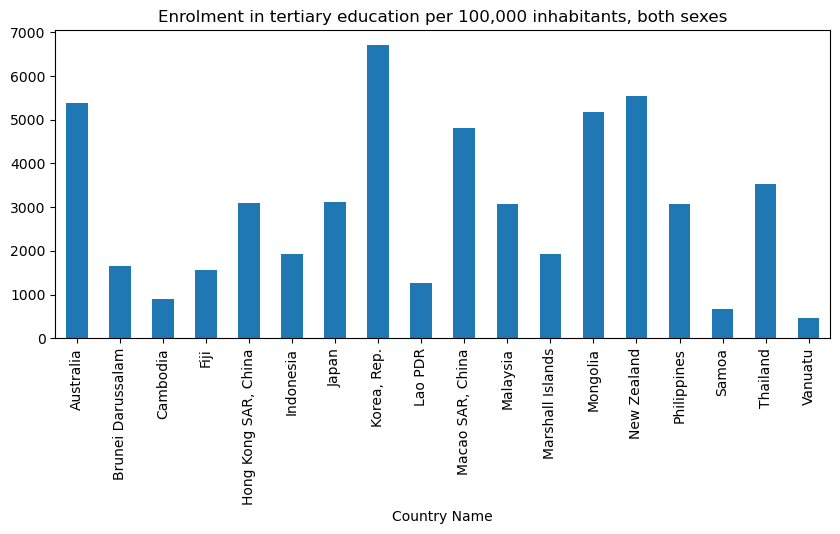

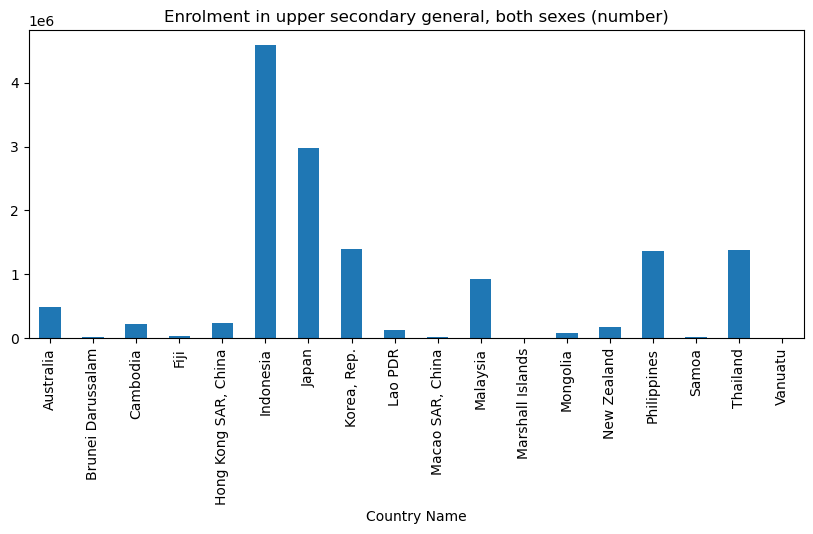

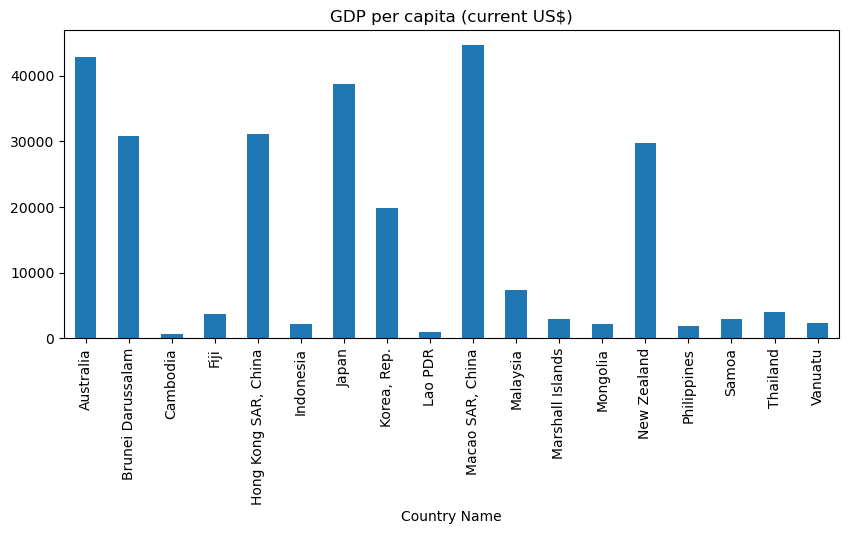

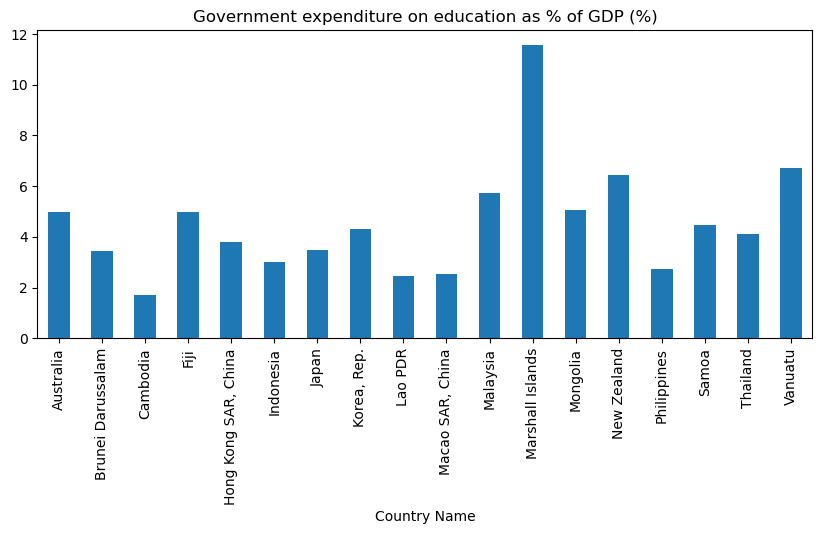

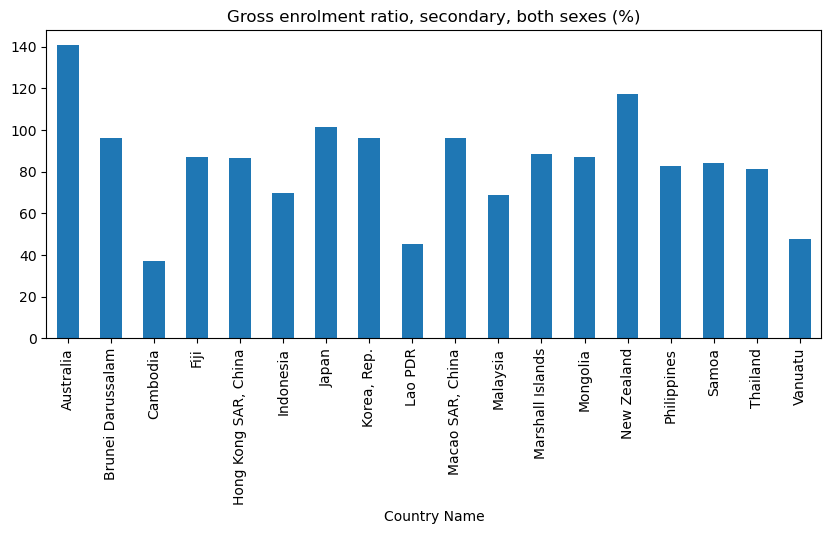

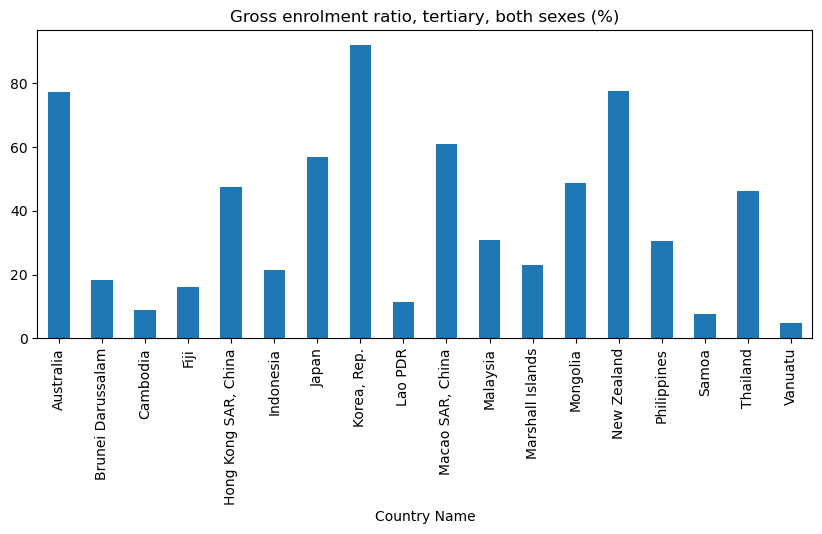

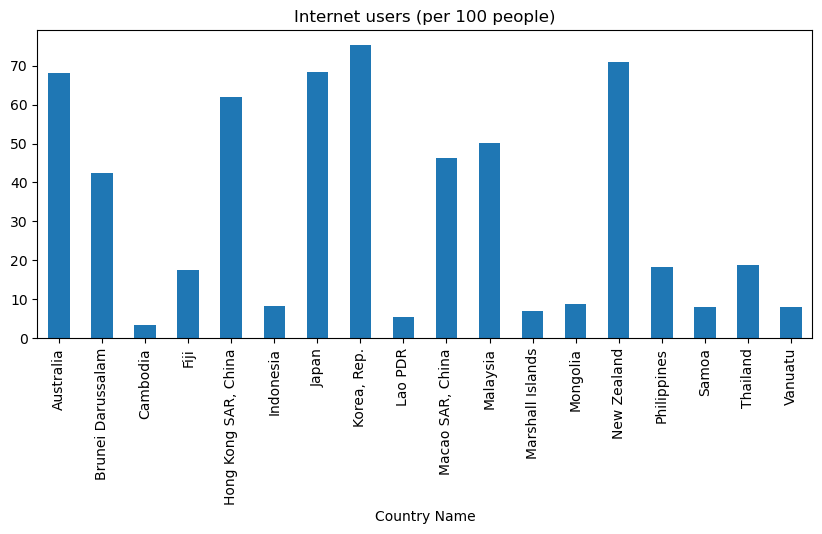

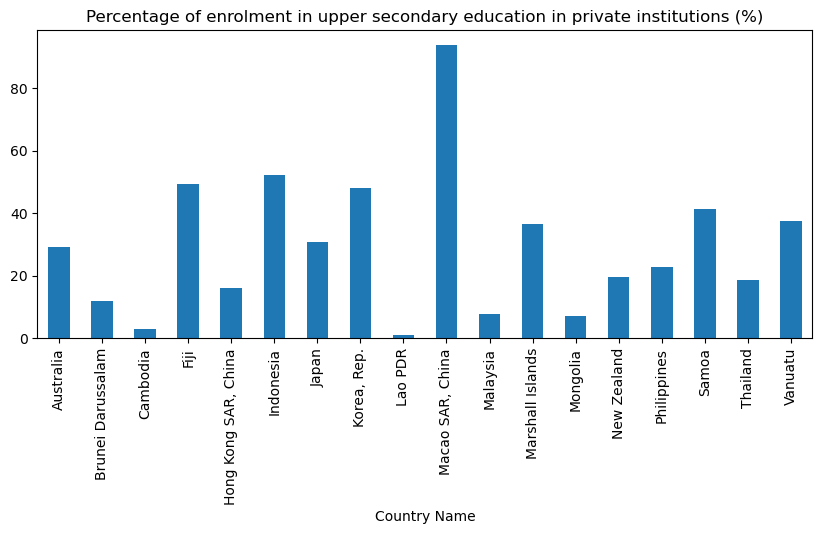

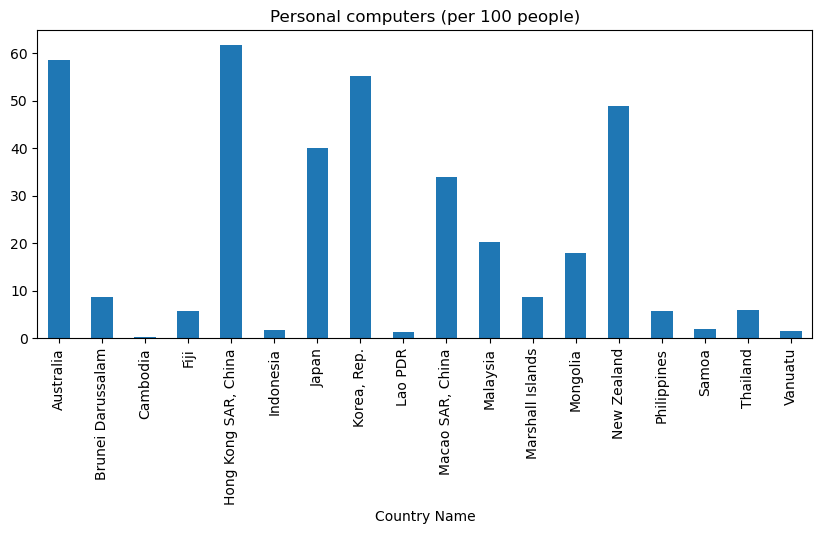

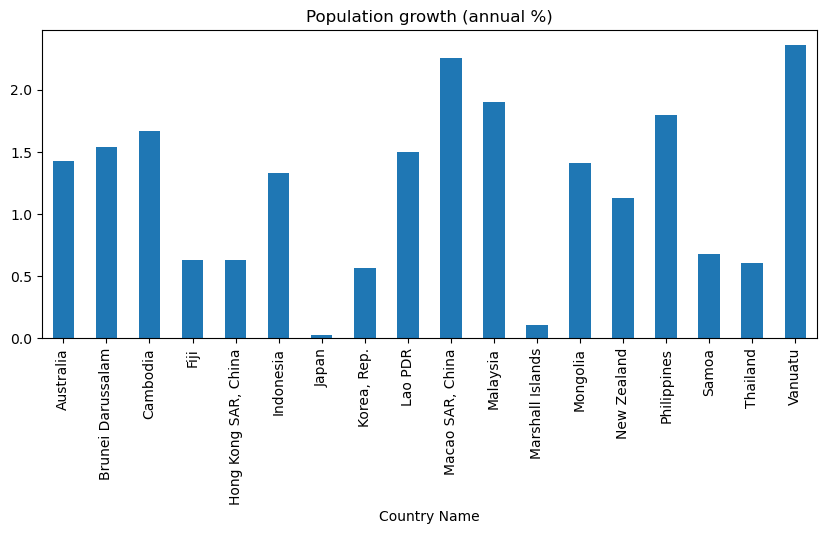

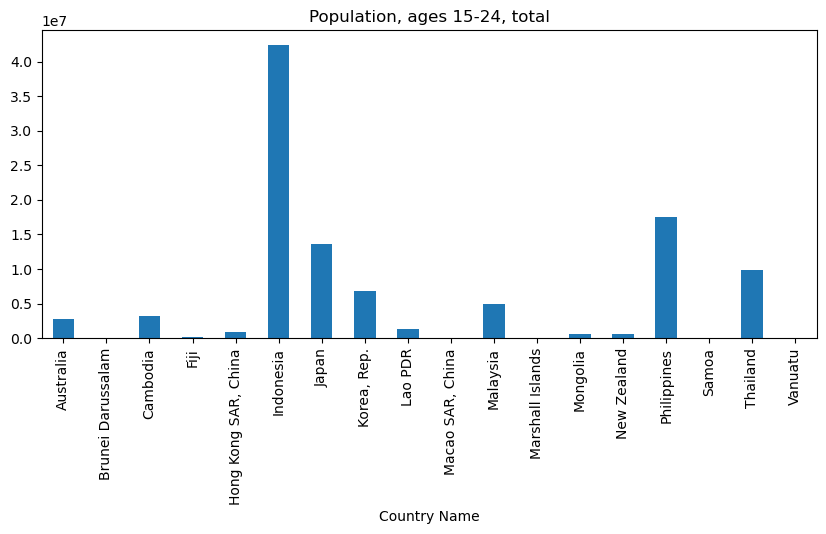

In [56]:
# Indicators of East Asian countries

# sorting

East_Asia = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'East Asia & Pacific'] #filter df by region 

East_Asia_grp= East_Asia.groupby('Country Name').mean() #group countries within a region 
East_Asia_ind_list = East_Asia_grp.columns # create list of countries in a region 

for col in East_Asia_ind_list:
    East_Asia_grp= East_Asia.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    East_Asia_grp[col].plot(kind = 'bar') # create a bar plot
    plt.title(col)
    plt.show()  

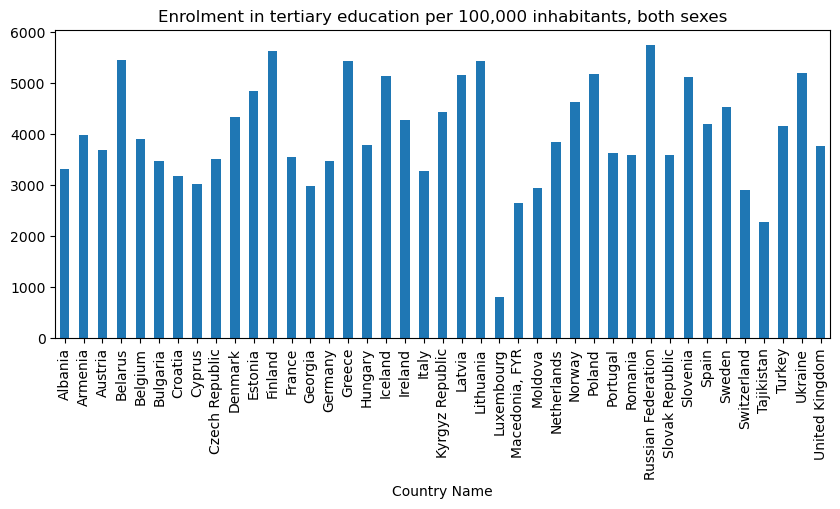

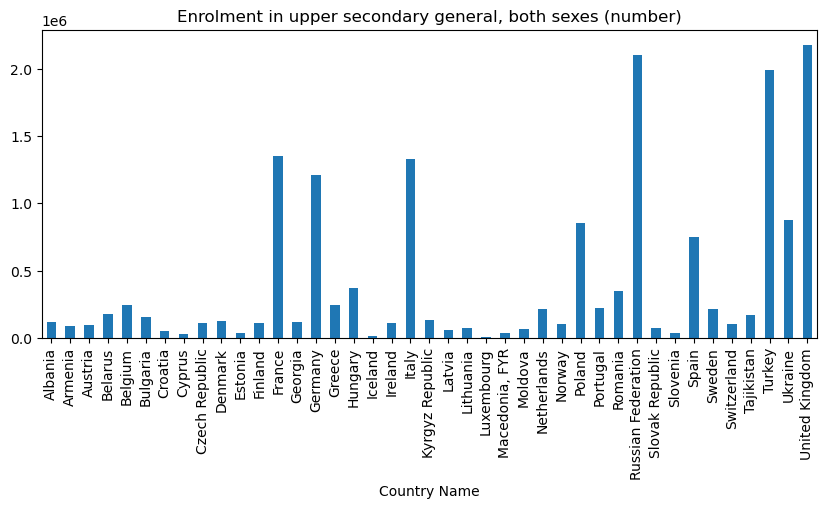

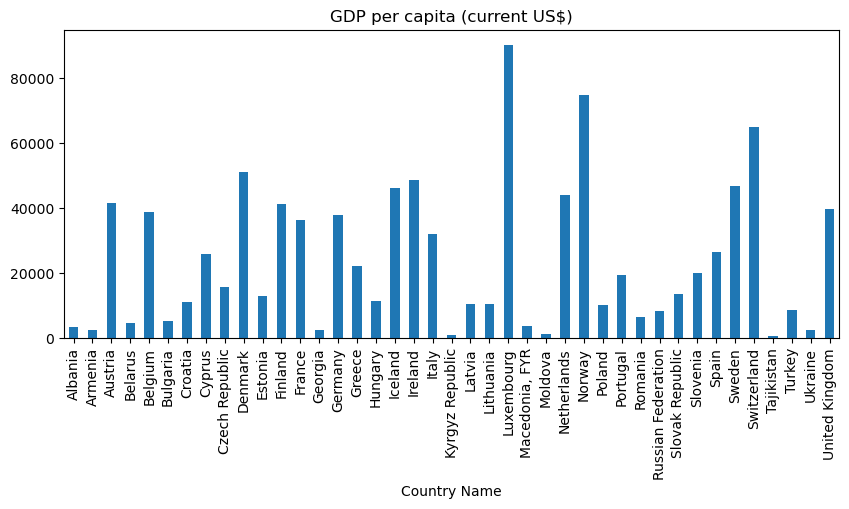

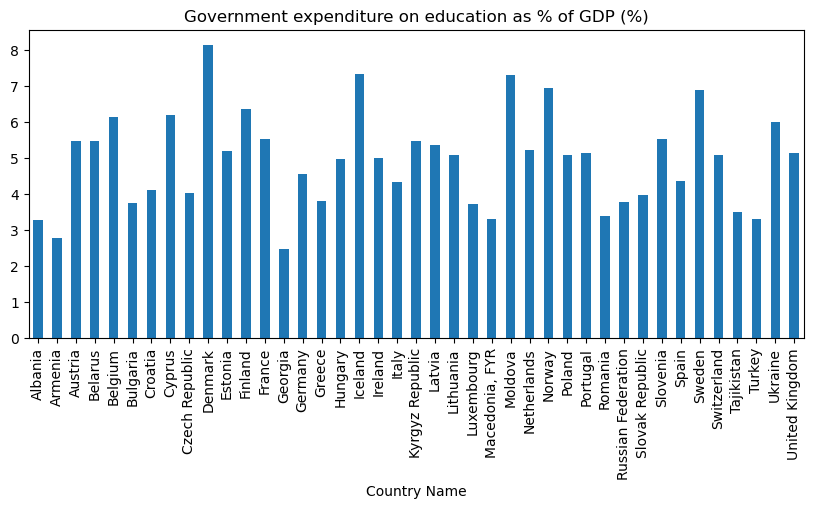

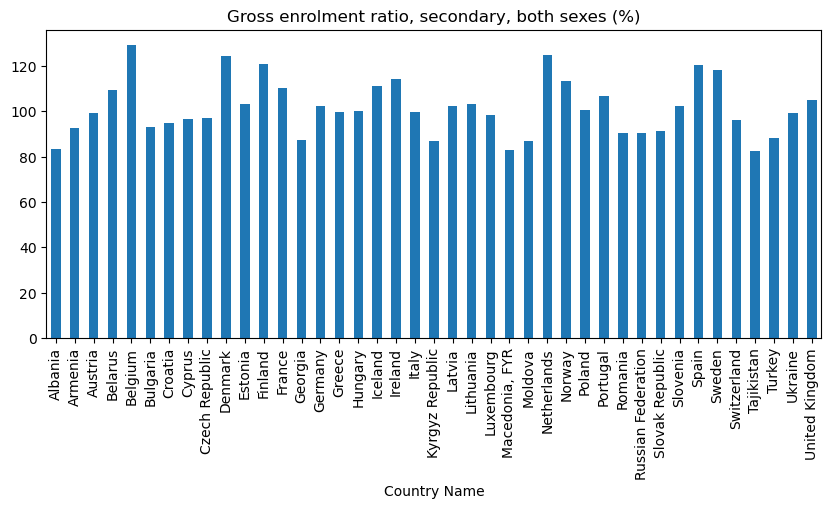

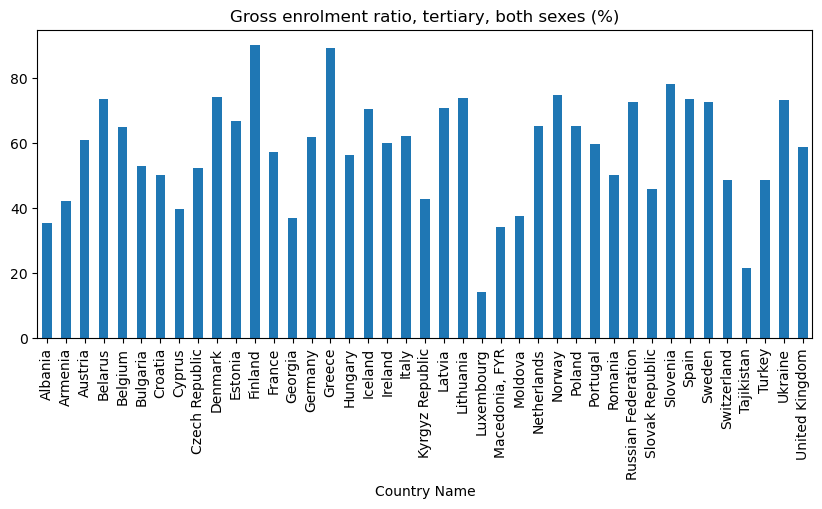

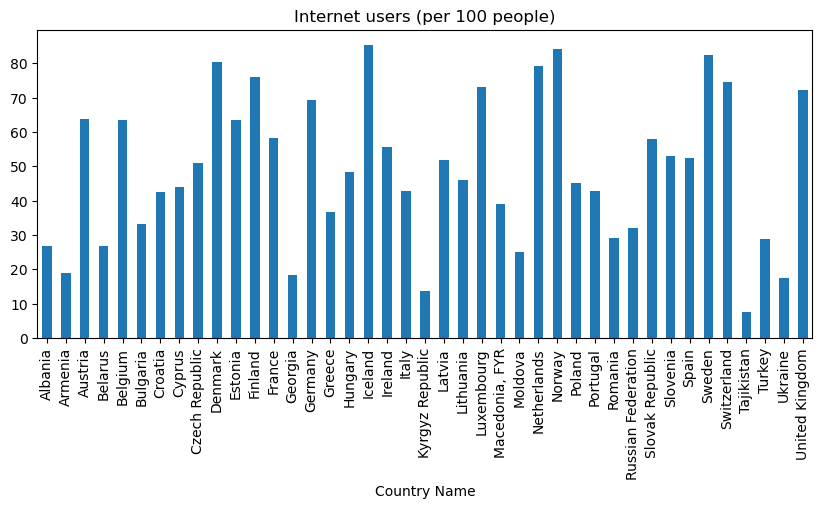

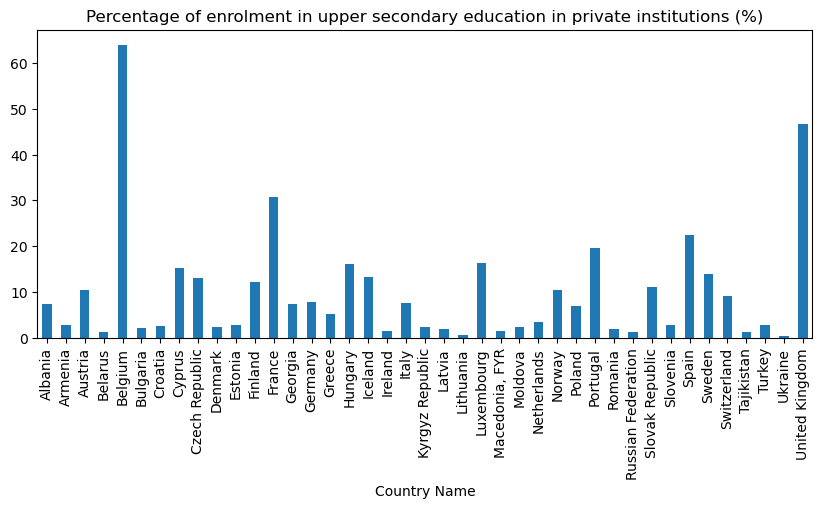

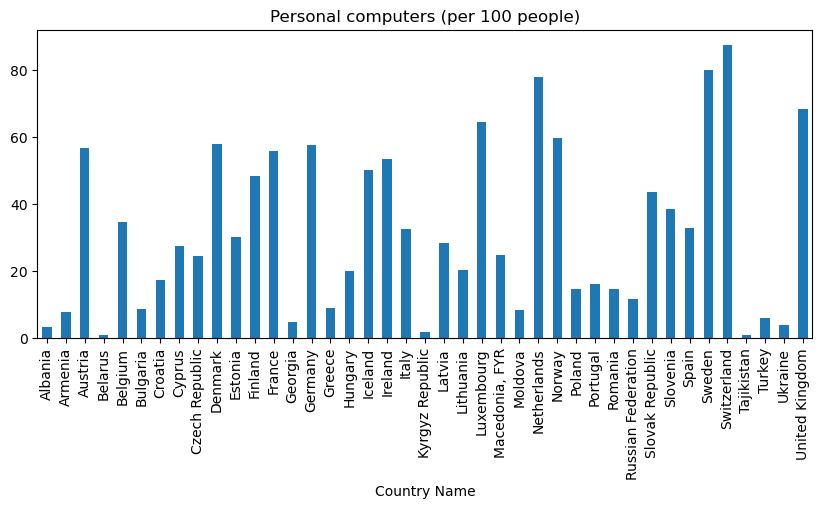

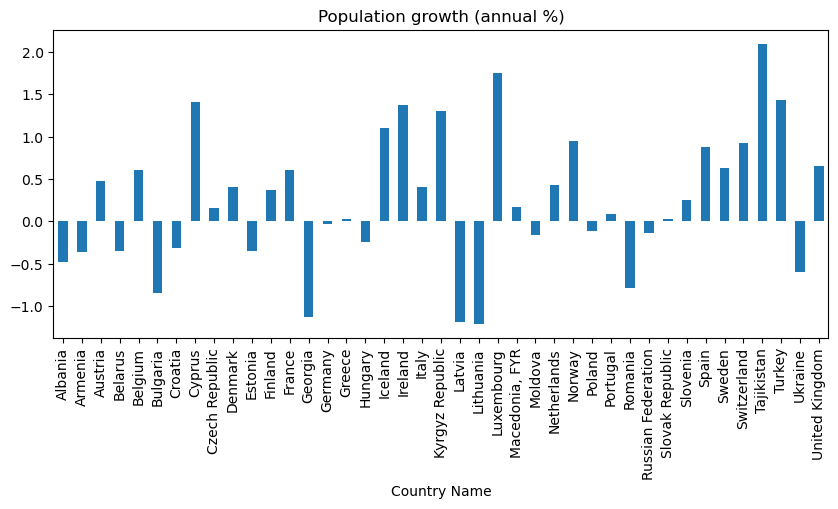

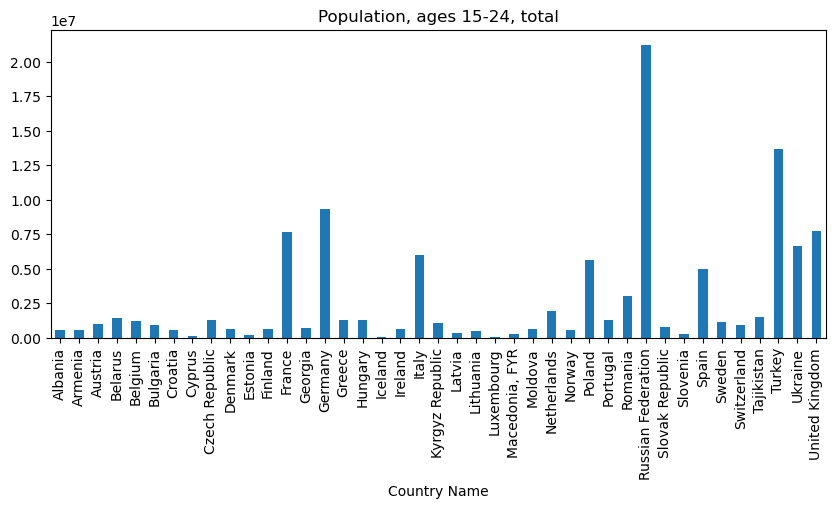

In [57]:
# Europe & Central Asia

Eur_C_Asia = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'Europe & Central Asia']
Eur_C_Asia_grp= Eur_C_Asia.groupby('Country Name').mean()

Eur_C_Asia_ind_list = Eur_C_Asia_grp.columns

for col in Eur_C_Asia_ind_list:
    Eur_C_Asia_grp= Eur_C_Asia.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    Eur_C_Asia_grp[col].plot(kind = 'bar')
    plt.title(col)
    plt.show() 

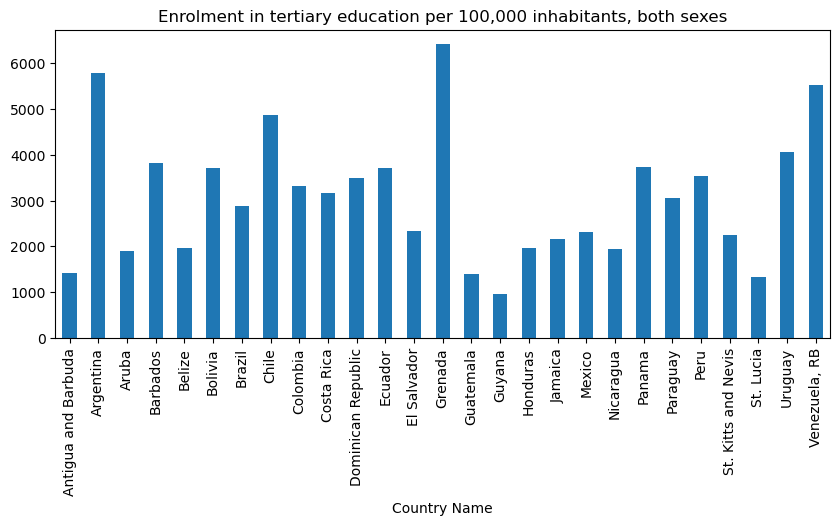

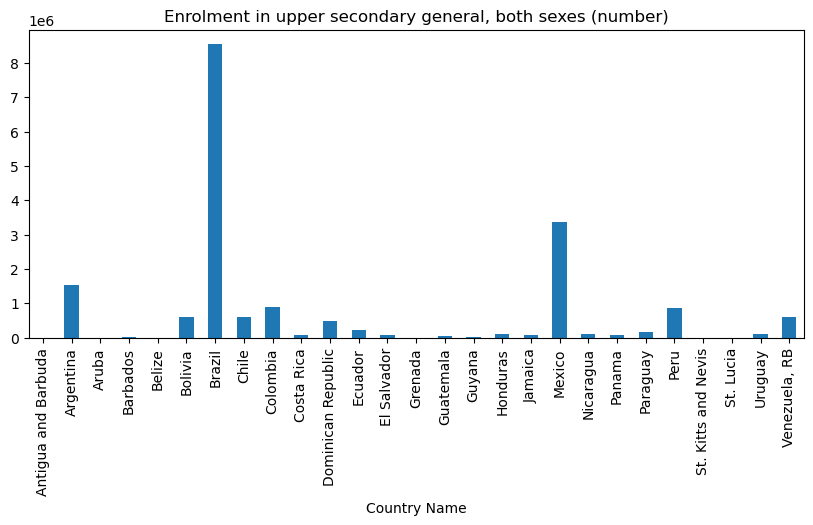

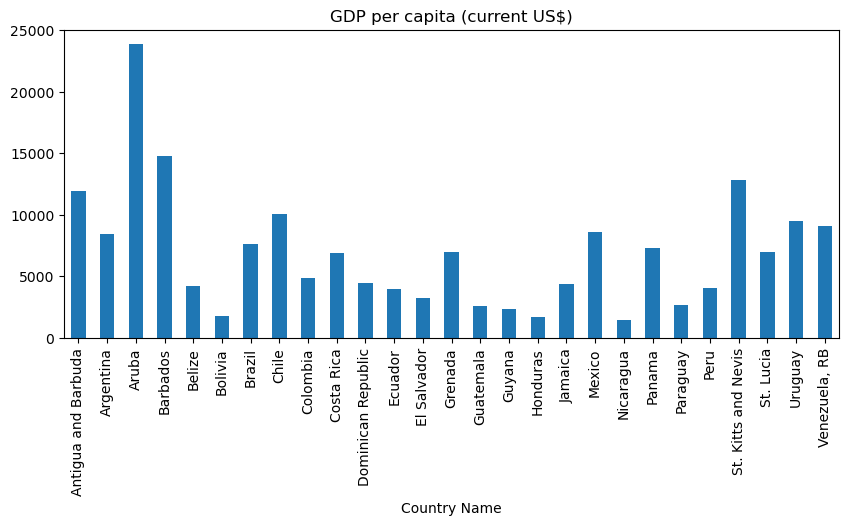

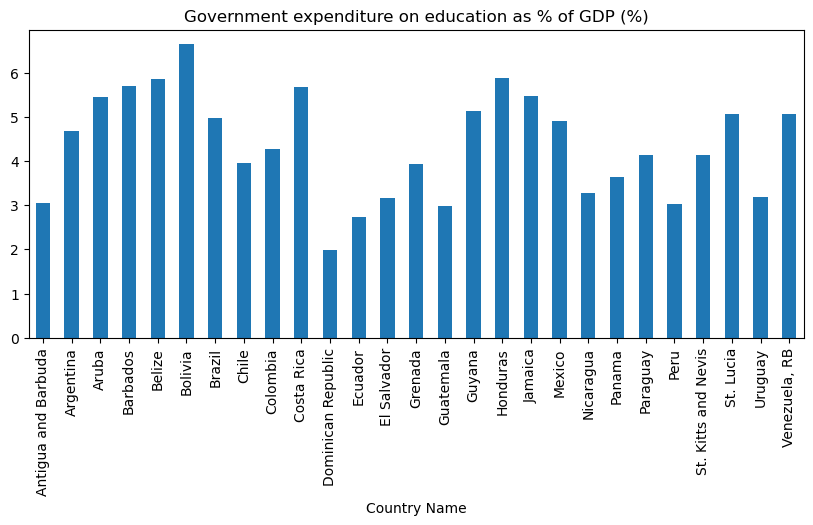

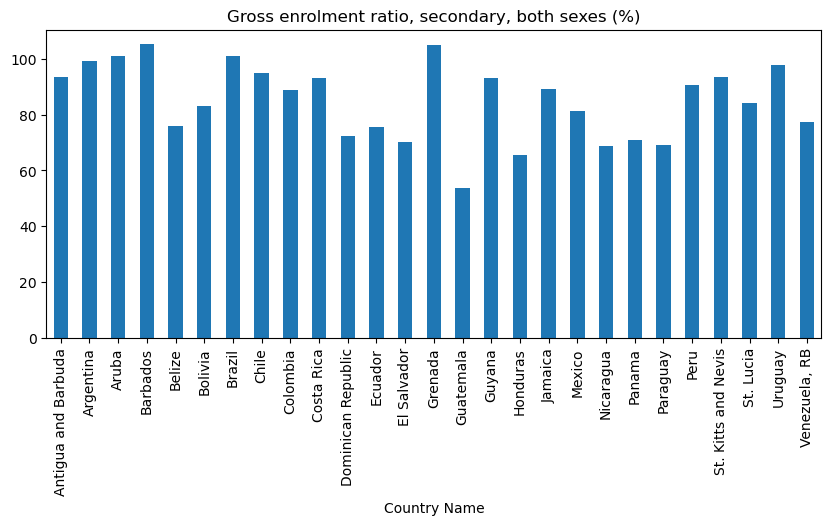

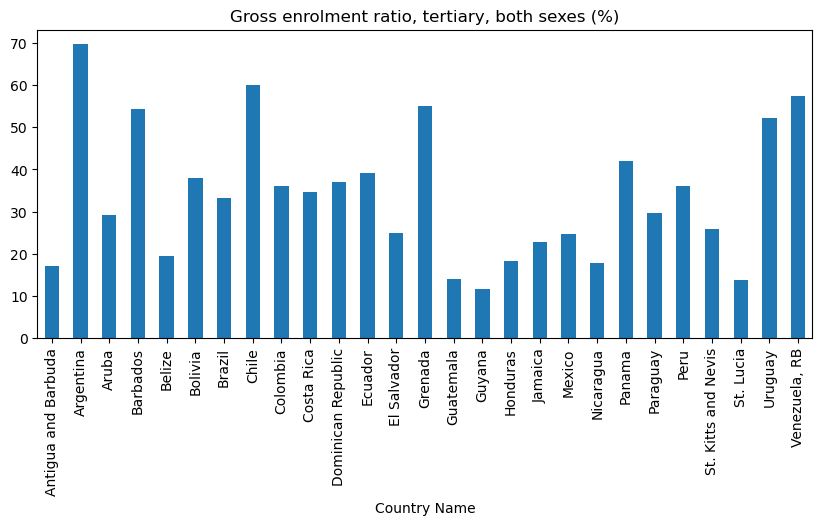

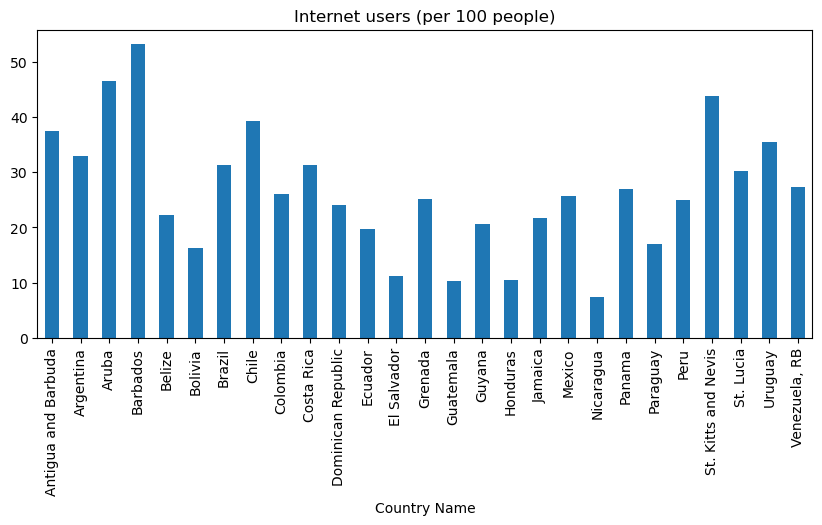

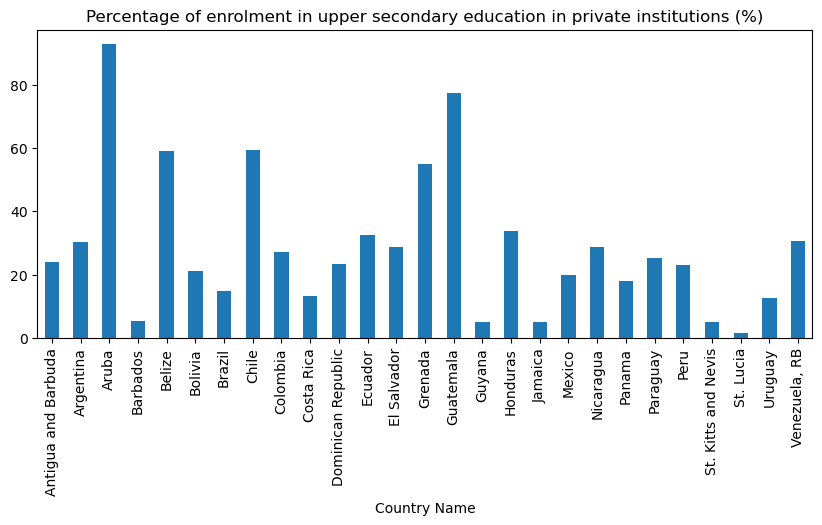

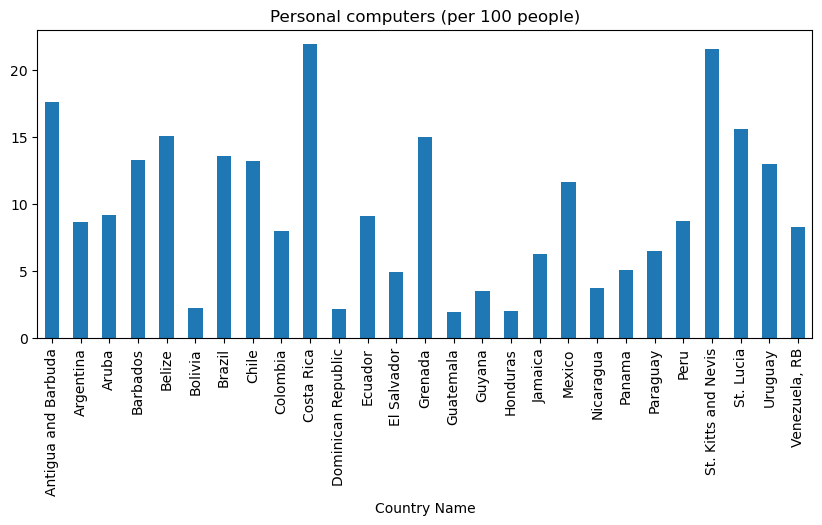

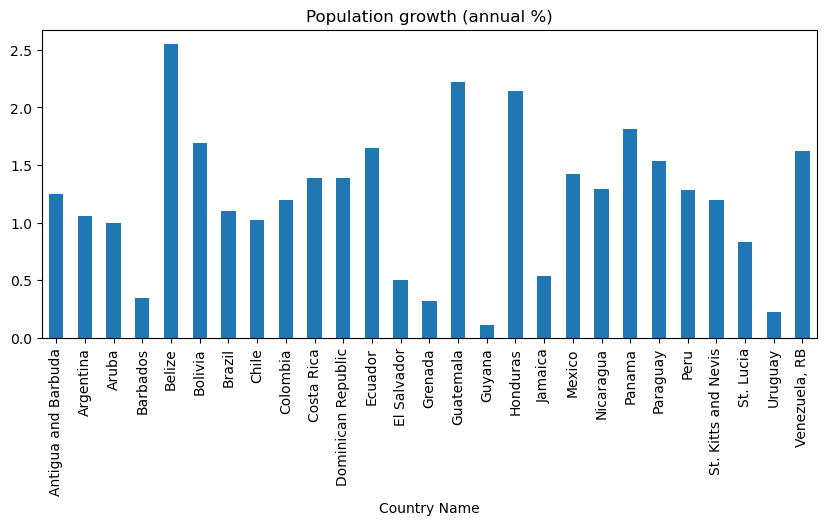

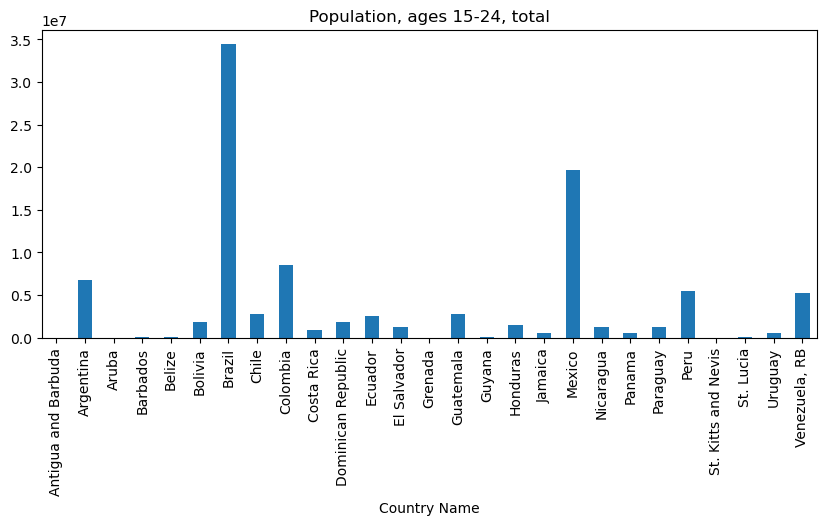

In [58]:
# Latin America & Caribbean

Lat_Am_Car = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'Latin America & Caribbean']
Lat_Am_Car_grp= Lat_Am_Car.groupby('Country Name').mean()

Lat_Am_Car_ind_list = Lat_Am_Car_grp.columns

for col in Lat_Am_Car_ind_list:
    Lat_Am_Car_grp= Lat_Am_Car.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    Lat_Am_Car_grp[col].plot(kind = 'bar')
    plt.title(col)
    plt.show()     

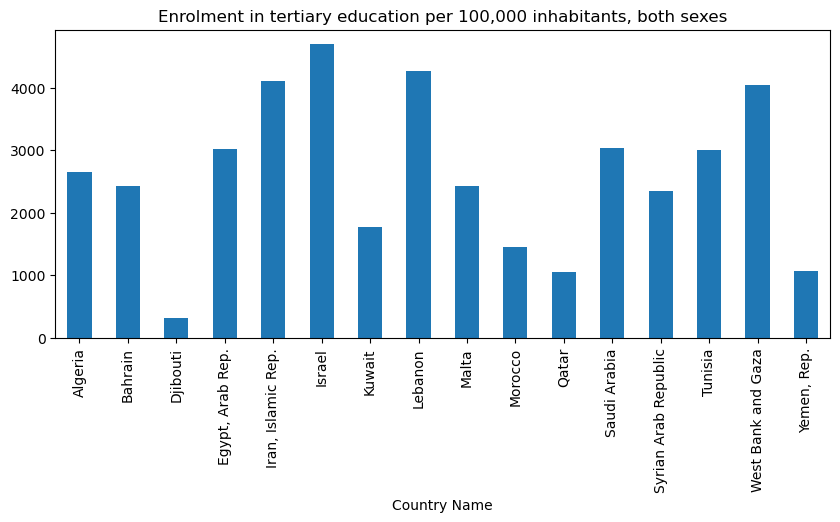

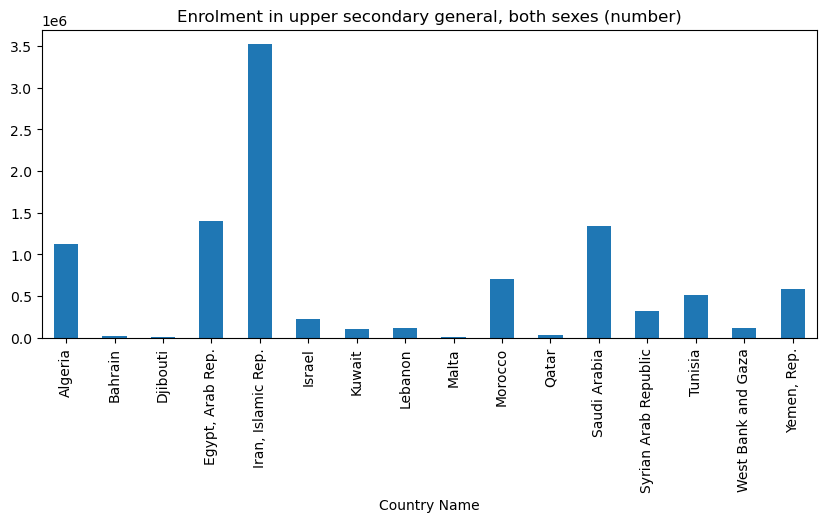

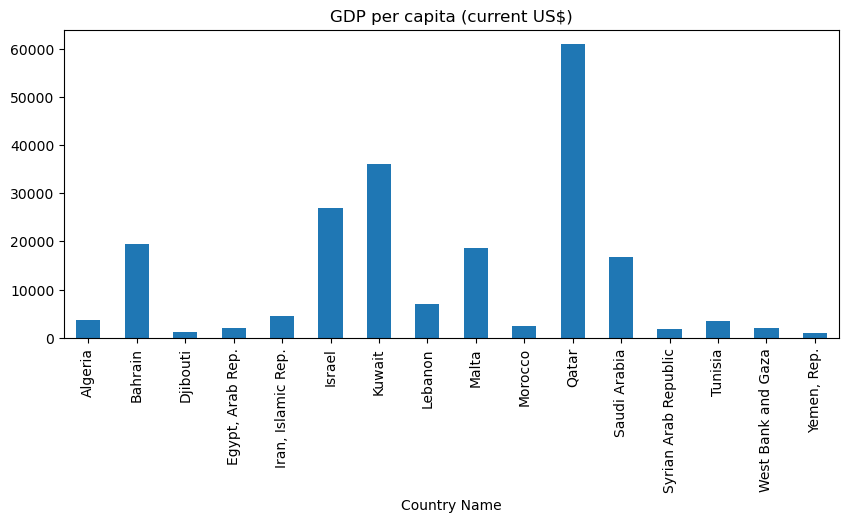

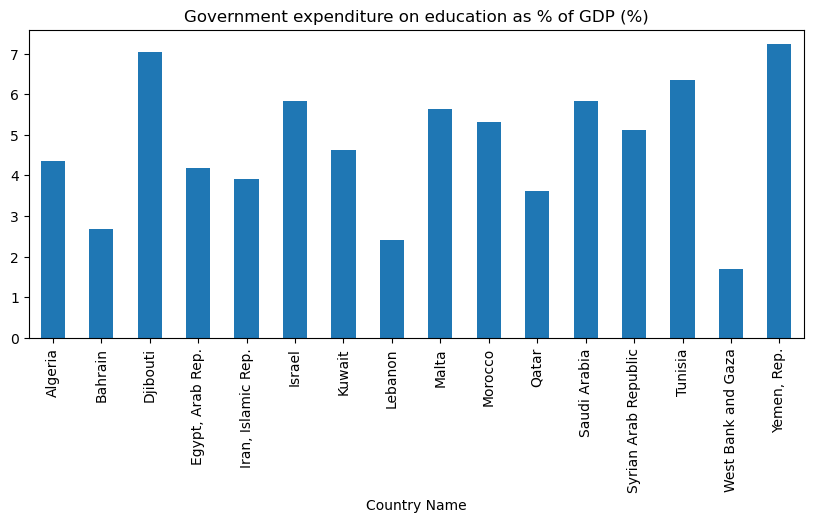

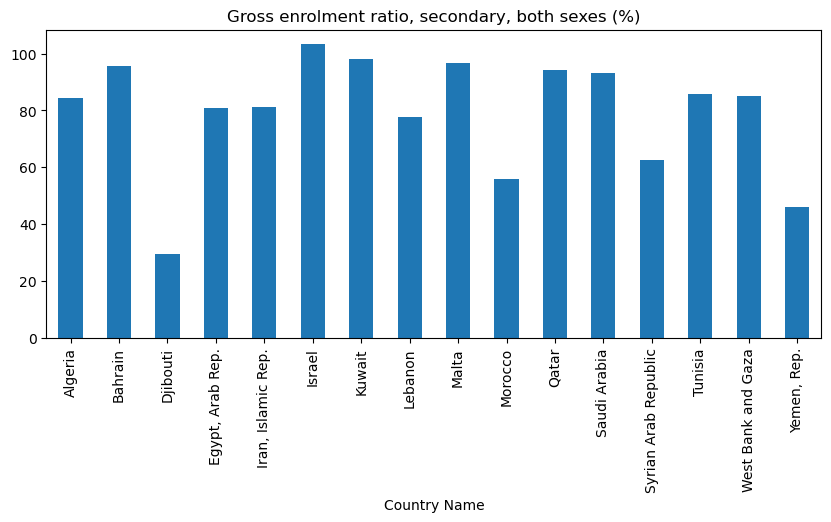

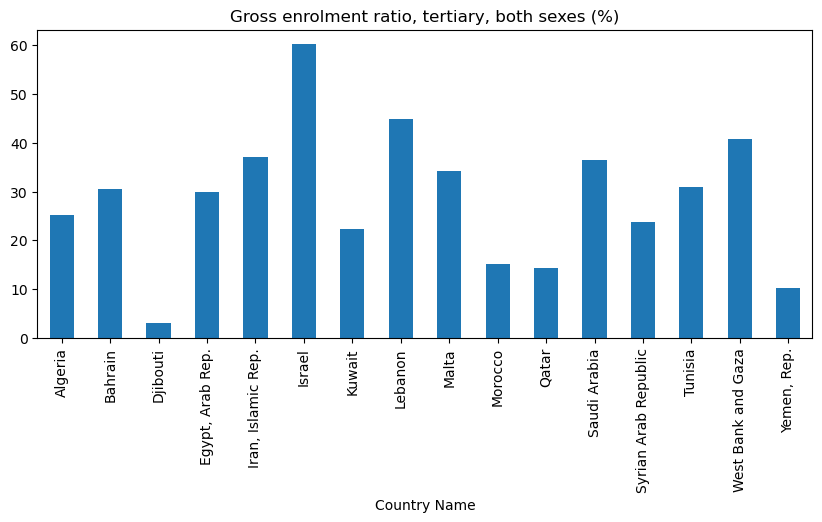

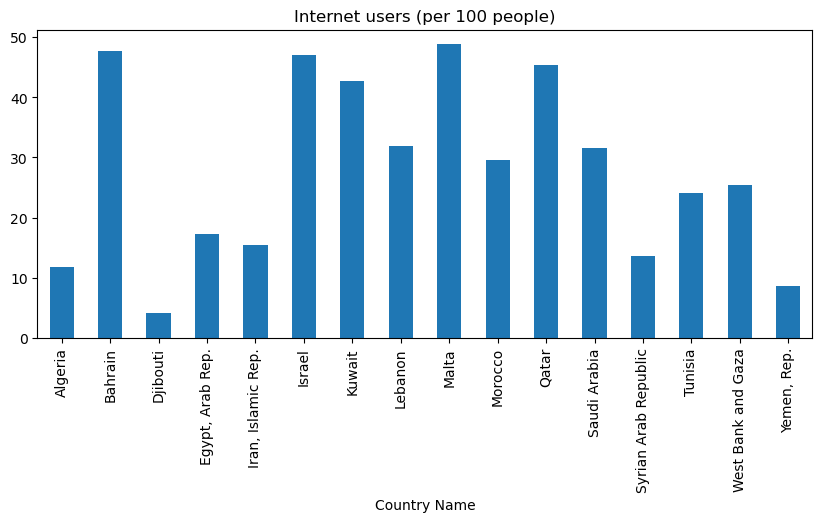

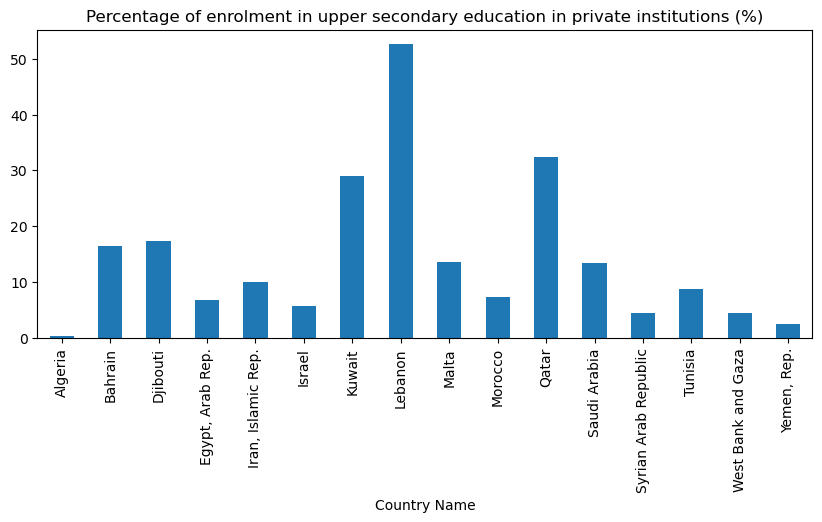

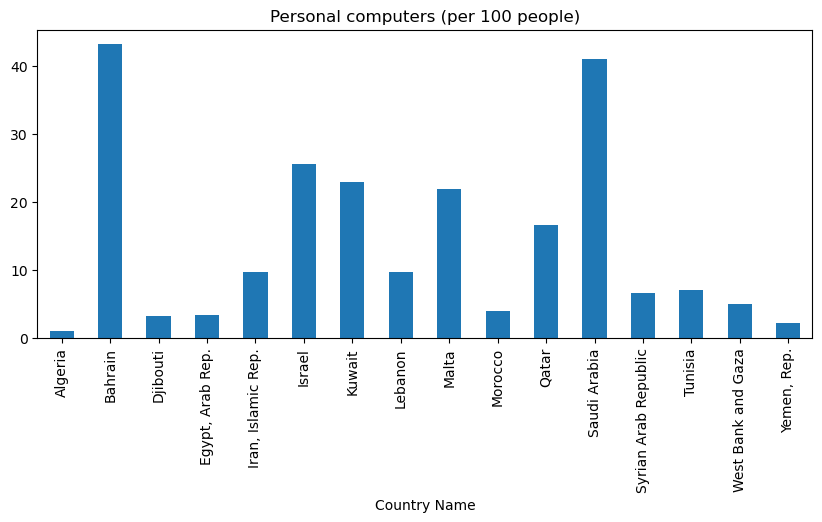

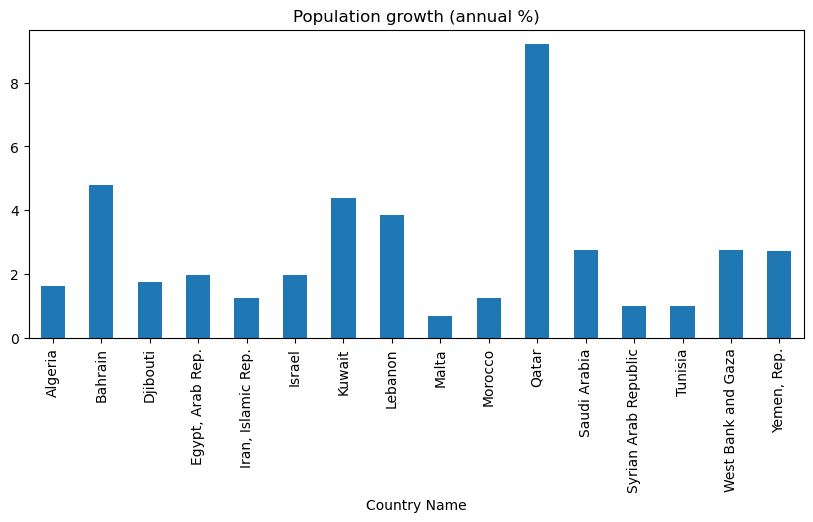

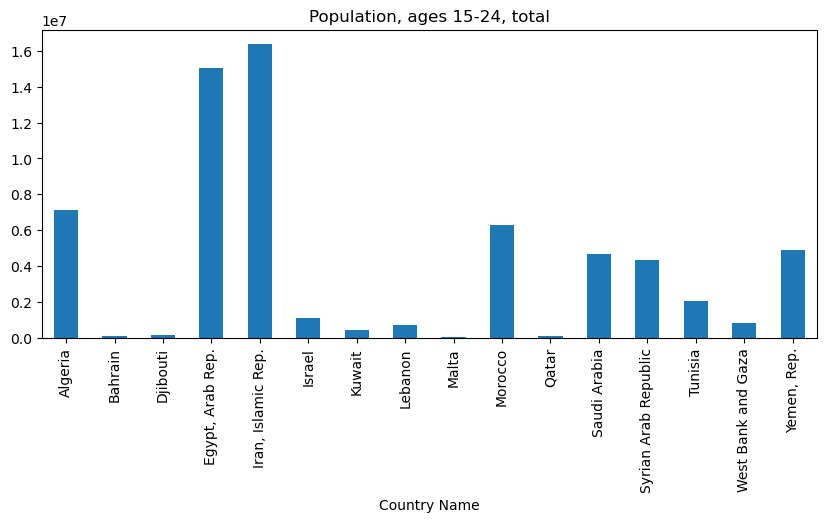

In [59]:
# Middle East & North Africa

ME_NA = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'Middle East & North Africa']
ME_NA_grp= ME_NA.groupby('Country Name').mean()

ME_NA_ind_list = ME_NA_grp.columns

for col in ME_NA_ind_list:
    ME_NA_grp= ME_NA.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    ME_NA_grp[col].plot(kind = 'bar')
    plt.title(col)
    plt.show() 

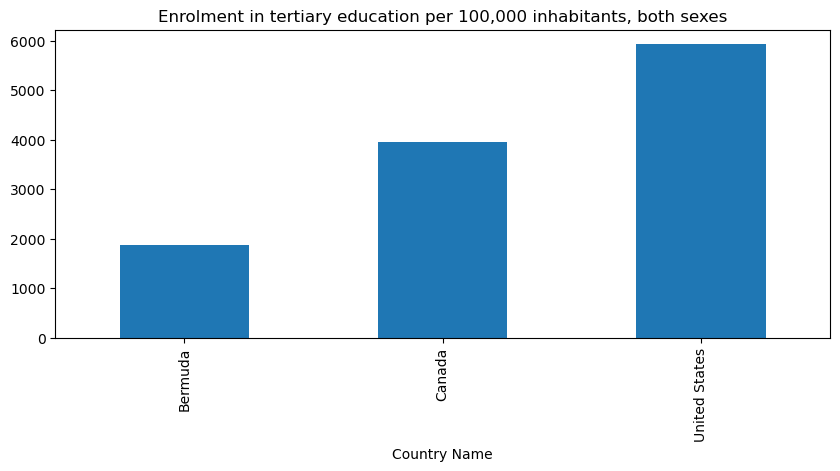

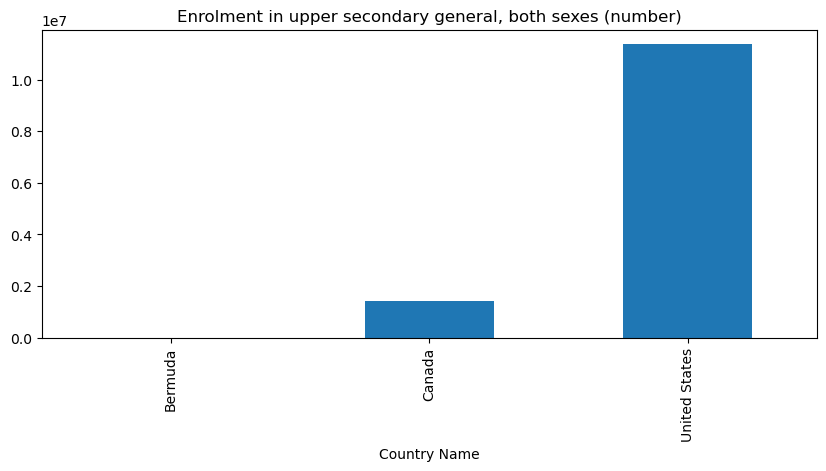

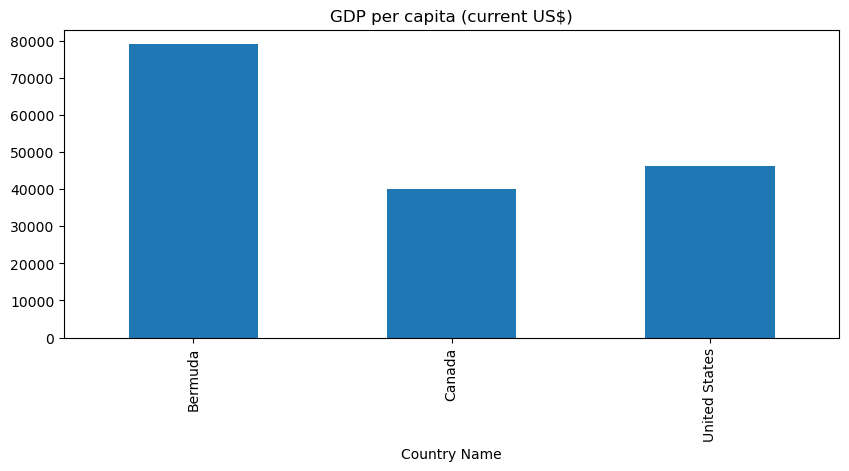

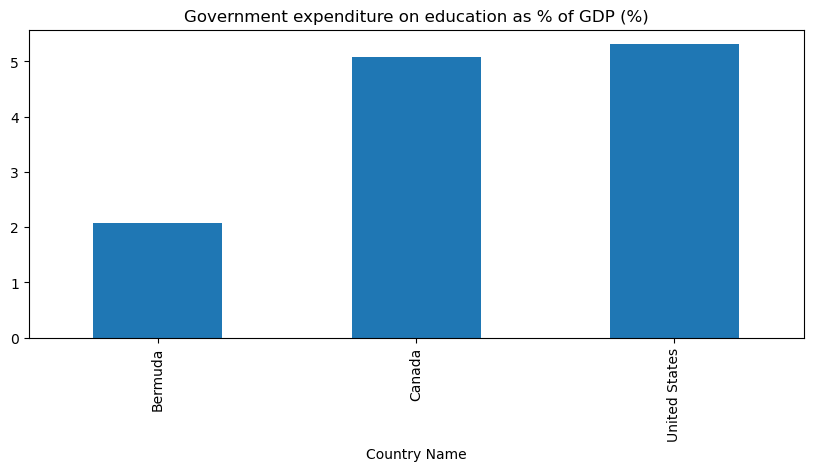

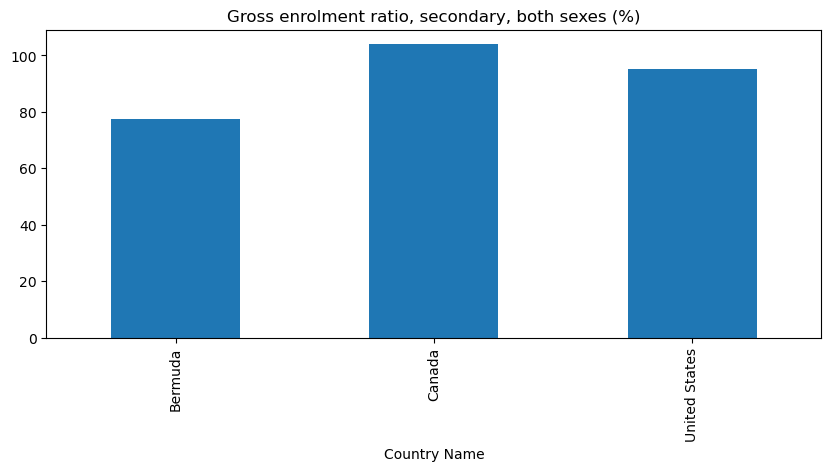

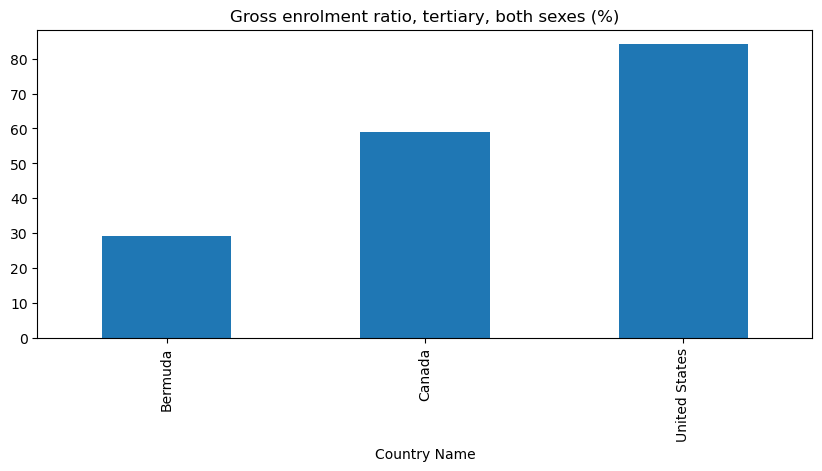

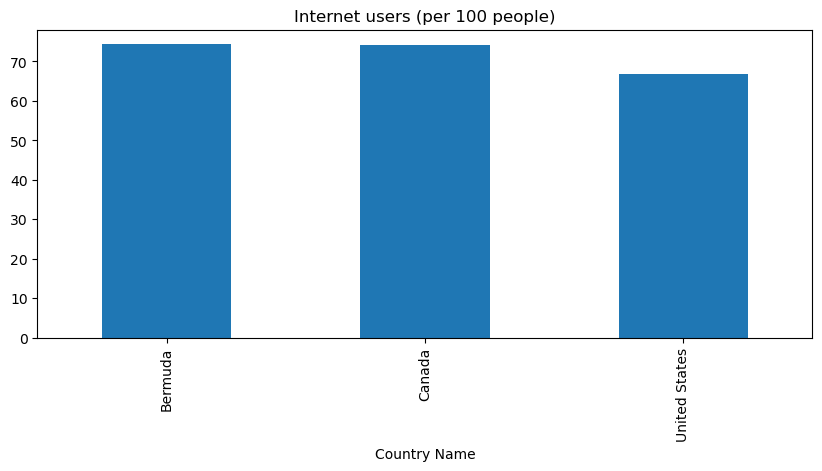

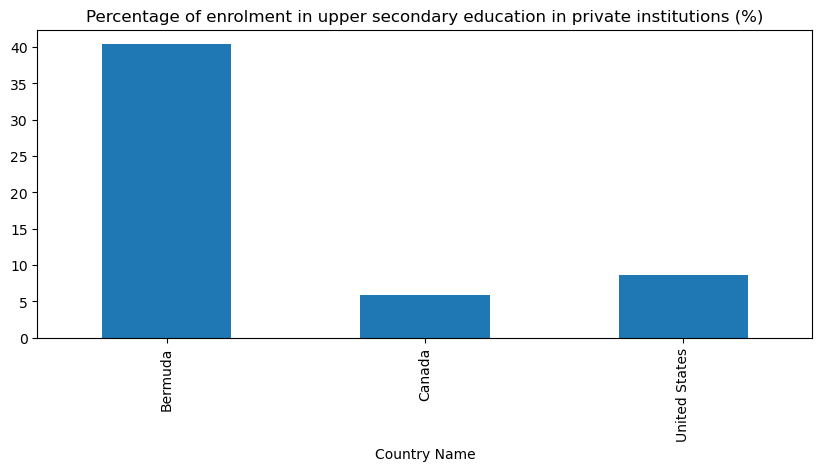

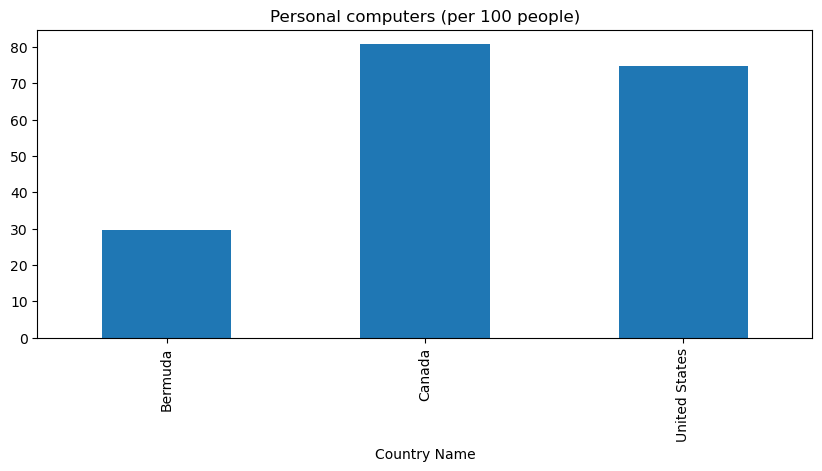

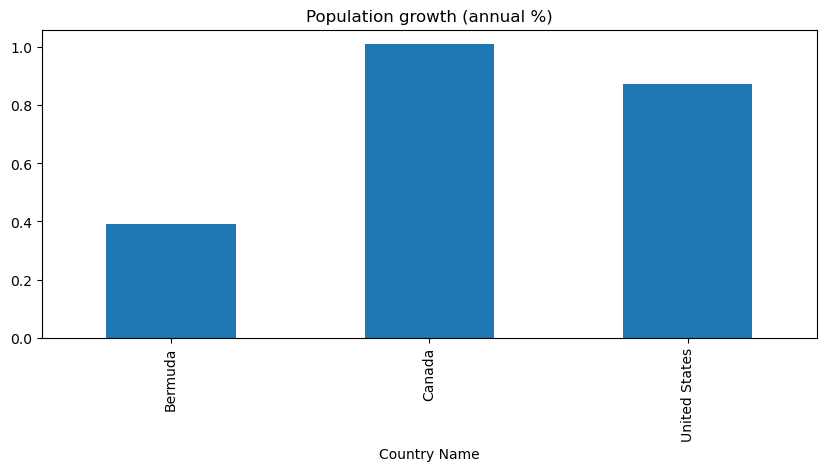

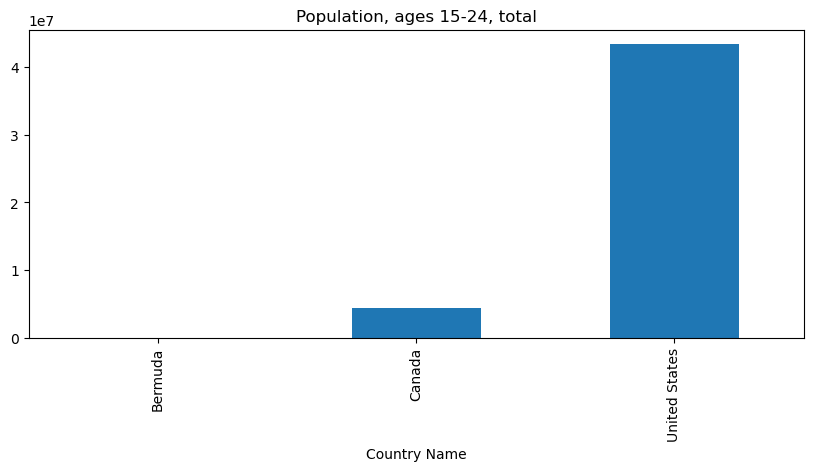

In [60]:
# North America

North_America = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'North America']
North_America_grp= North_America.groupby('Country Name').mean()

North_America_ind_list = North_America_grp.columns

for col in North_America_ind_list:
    North_America_grp= North_America.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    North_America_grp[col].plot(kind = 'bar')
    plt.title(col)
    plt.show() 

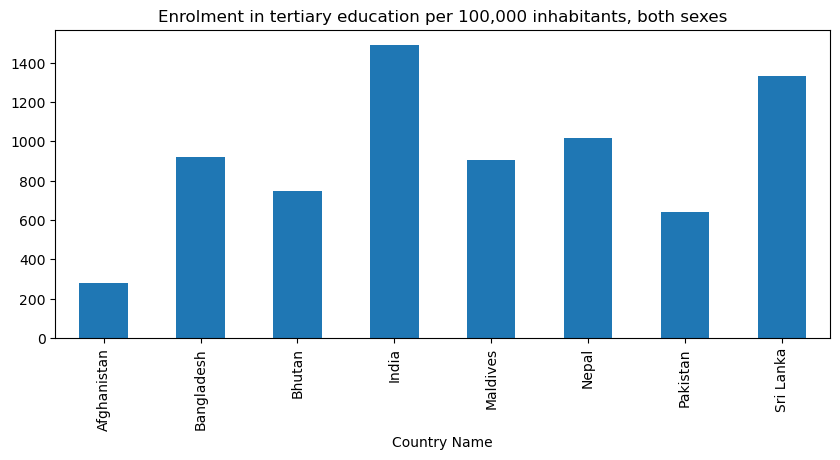

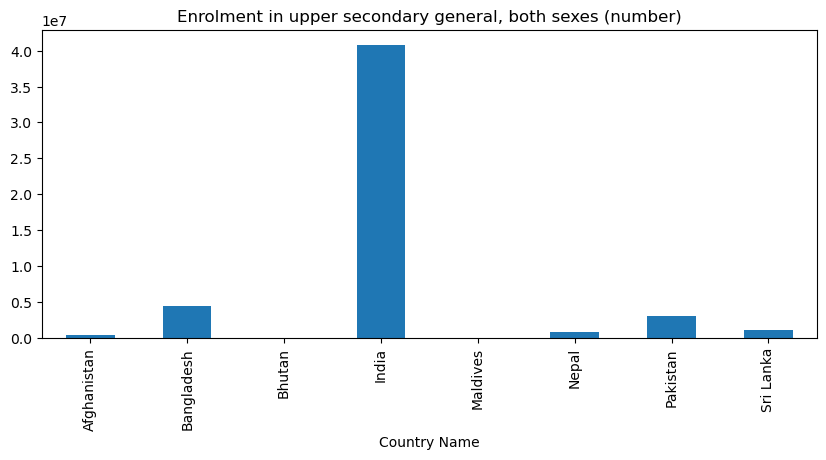

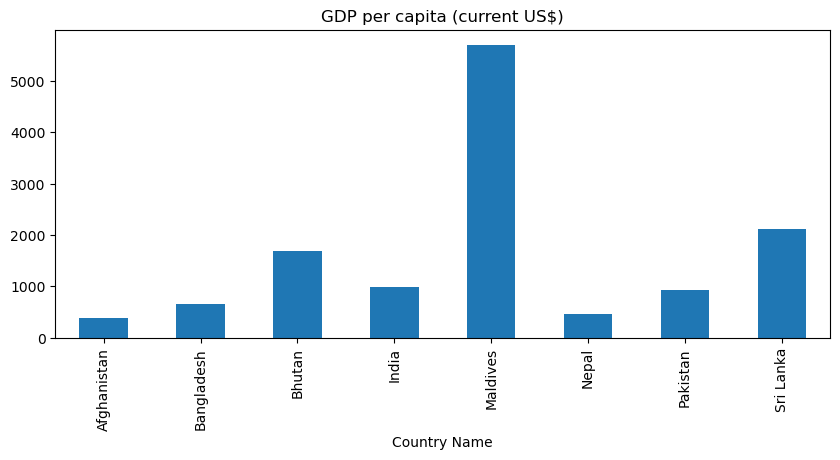

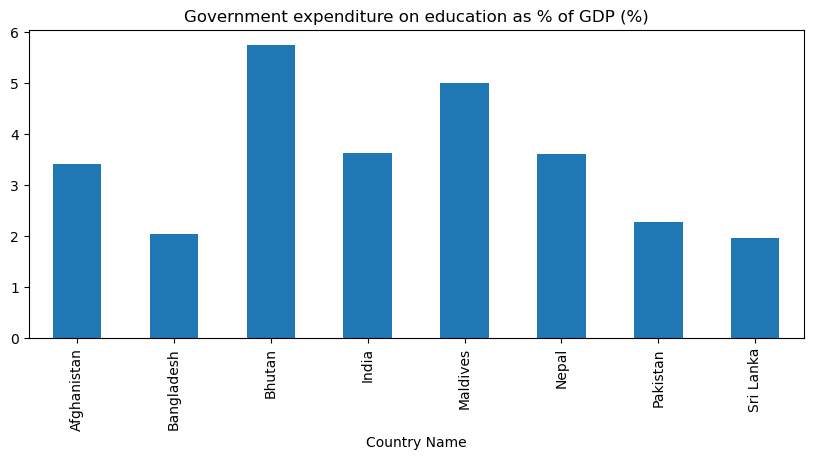

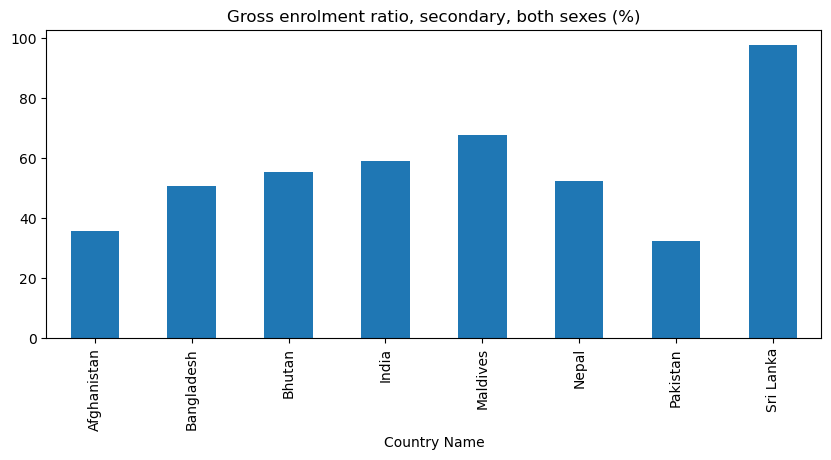

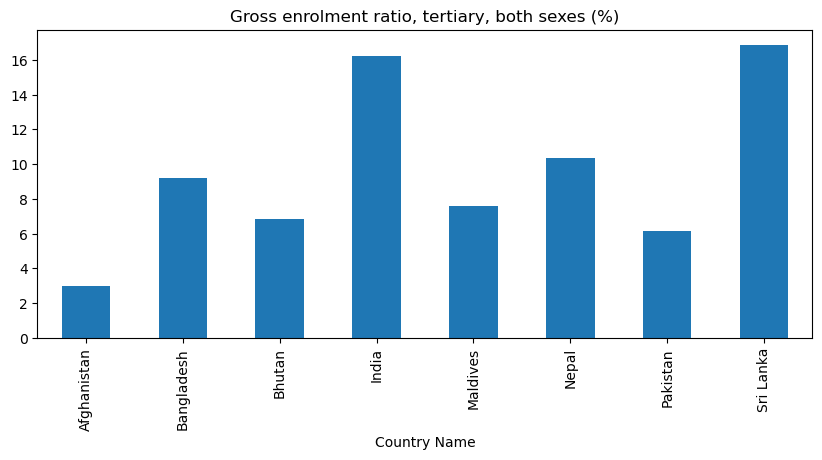

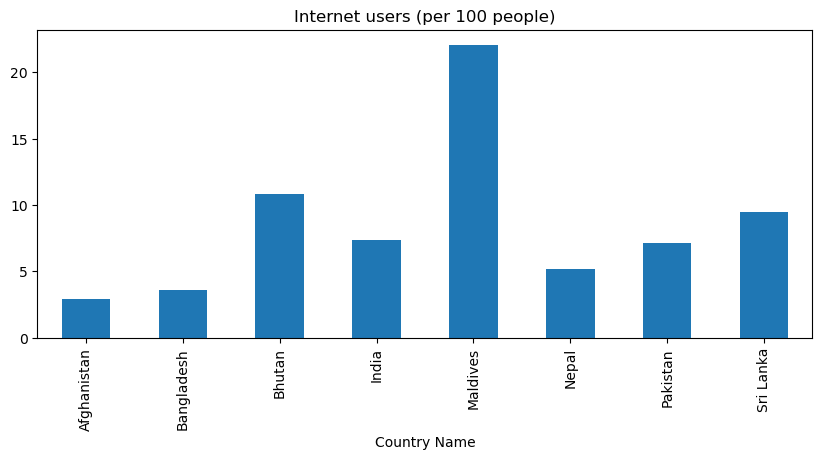

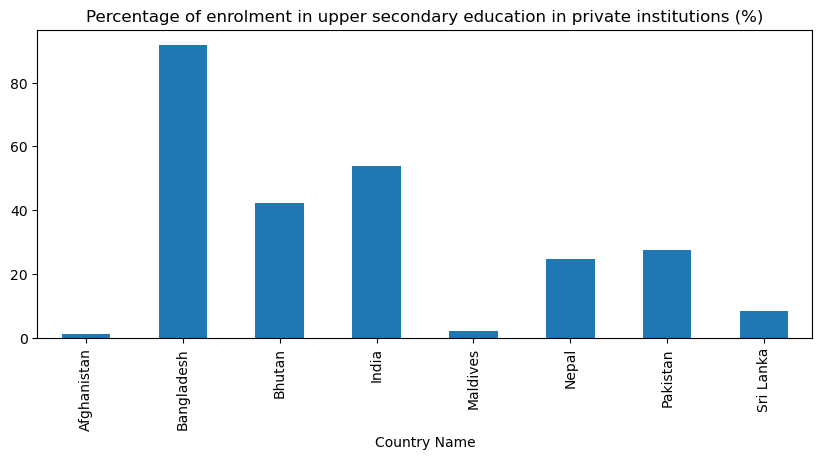

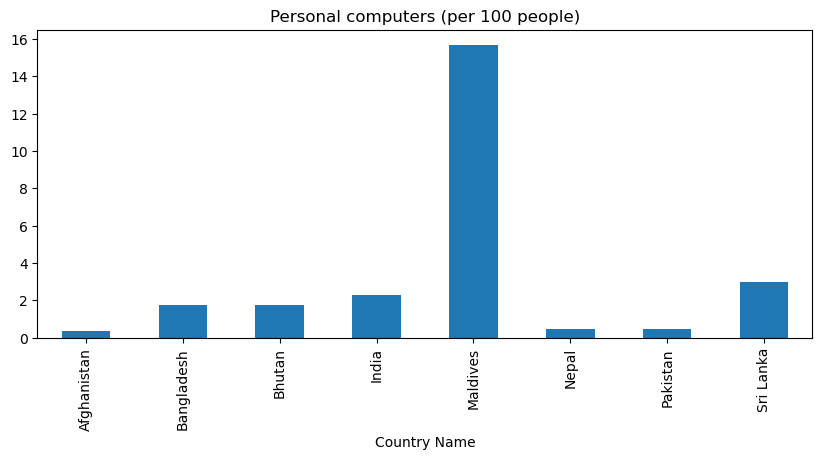

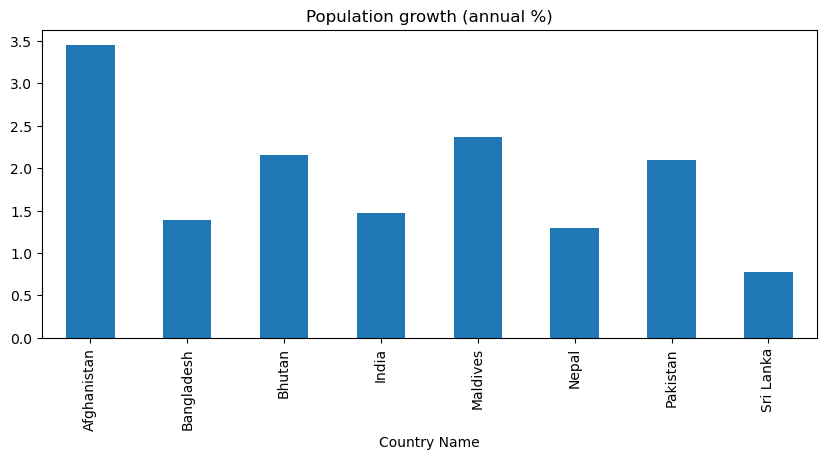

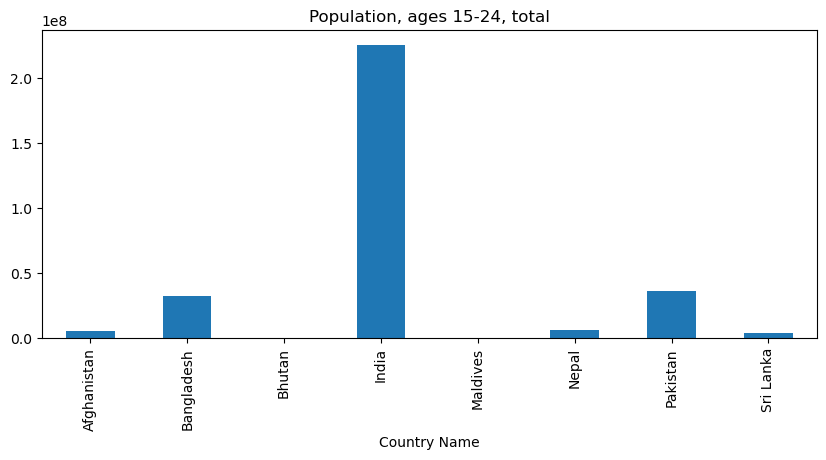

In [61]:
# South Asia

South_Asia = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'South Asia']
South_Asia_grp= South_Asia.groupby('Country Name').mean()

South_Asia_ind_list = South_Asia_grp.columns

for col in South_Asia_ind_list:
    South_Asia_grp= South_Asia.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    South_Asia_grp[col].plot(kind = 'bar')
    plt.title(col)
    plt.show() 

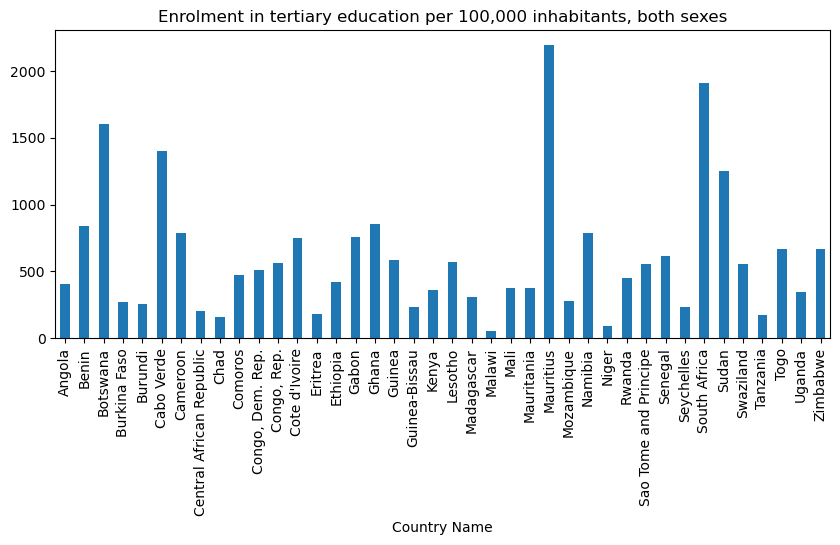

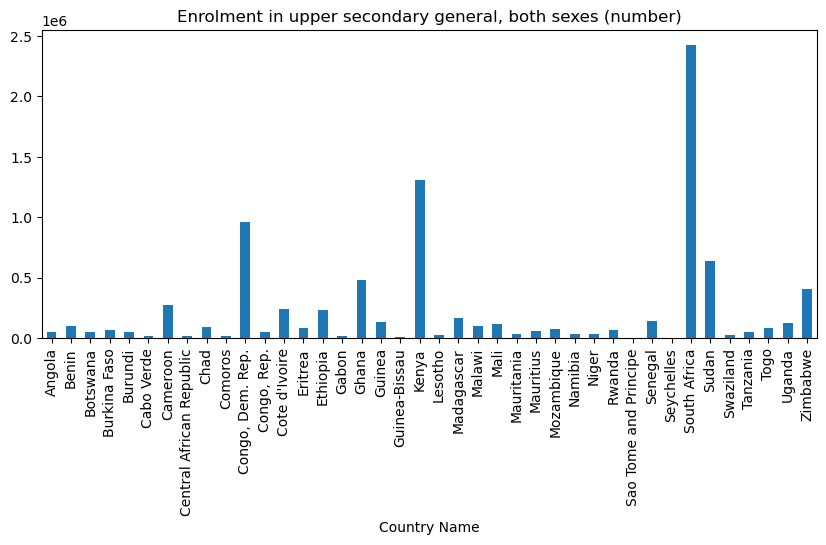

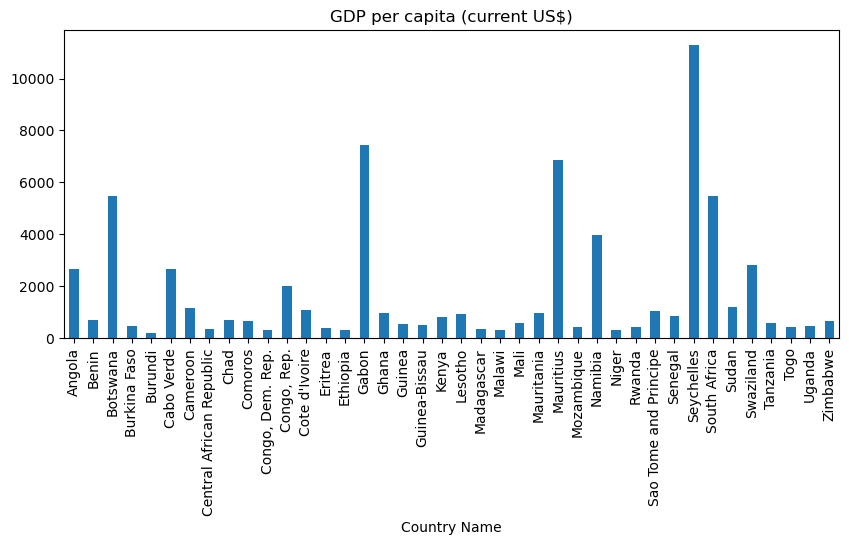

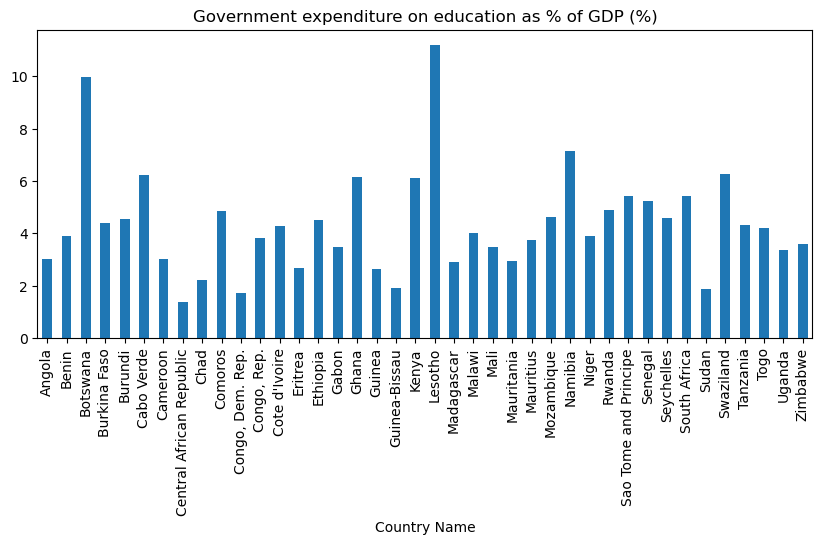

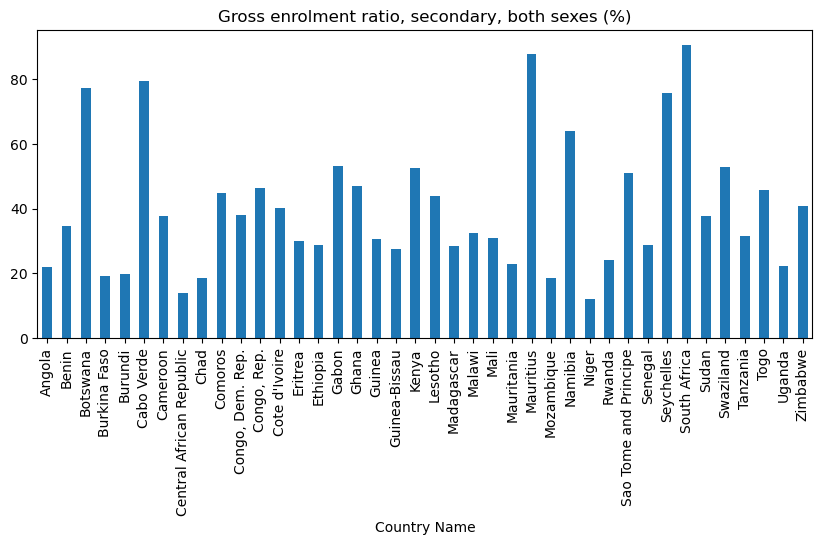

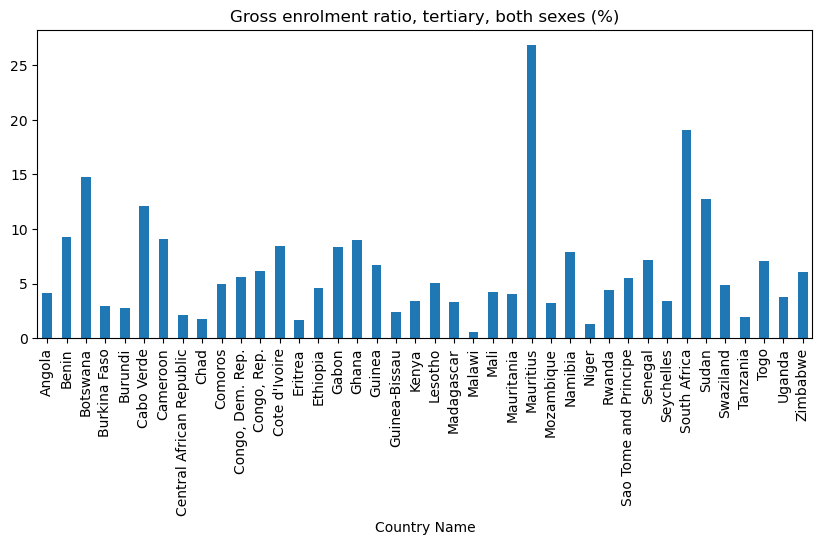

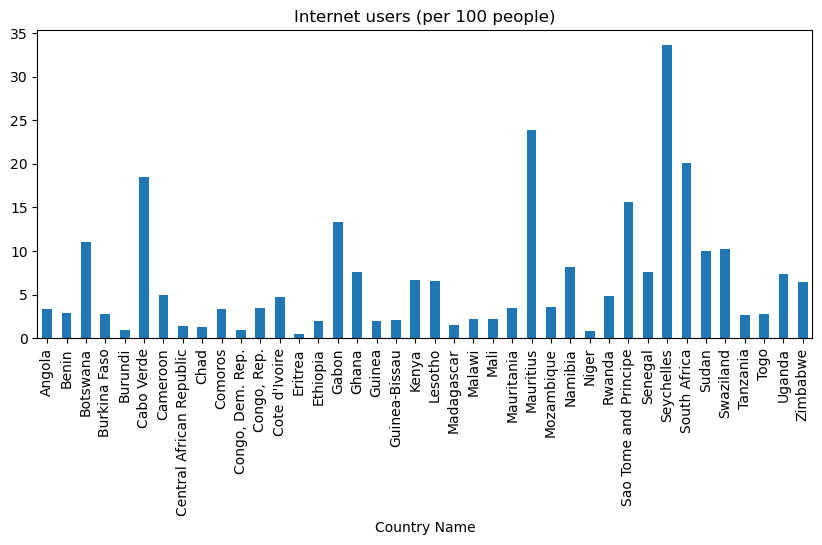

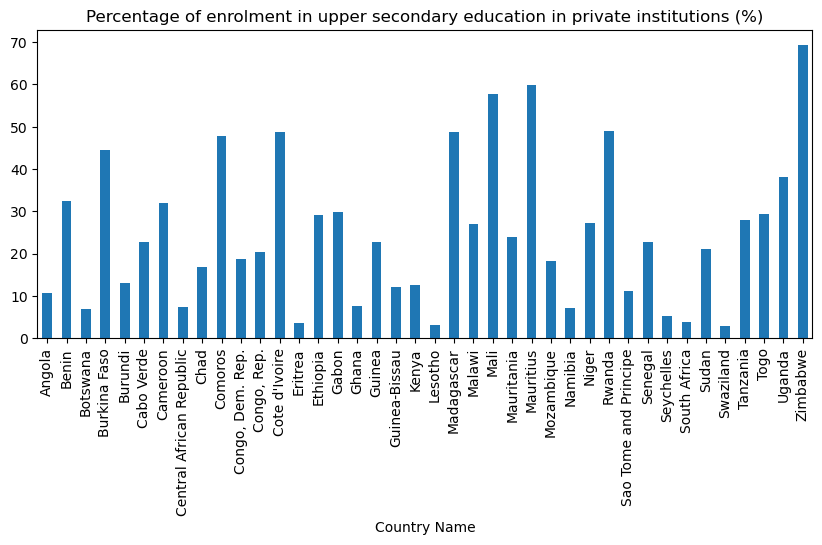

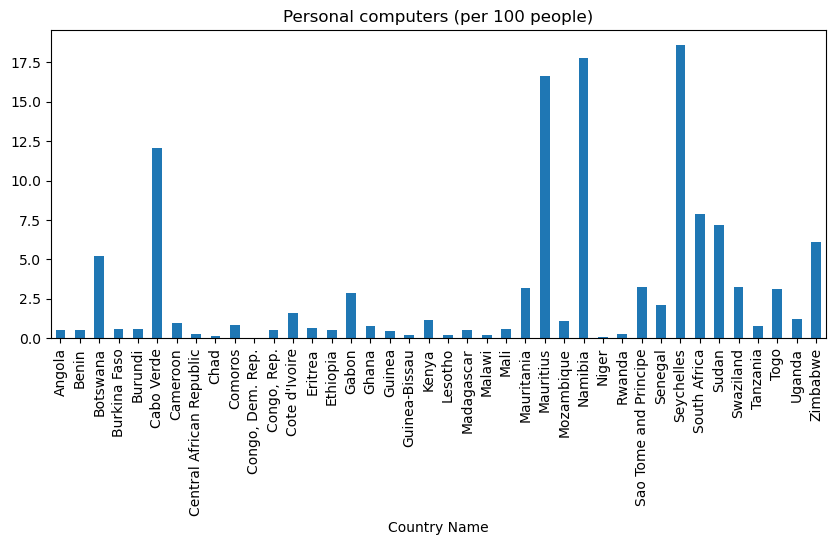

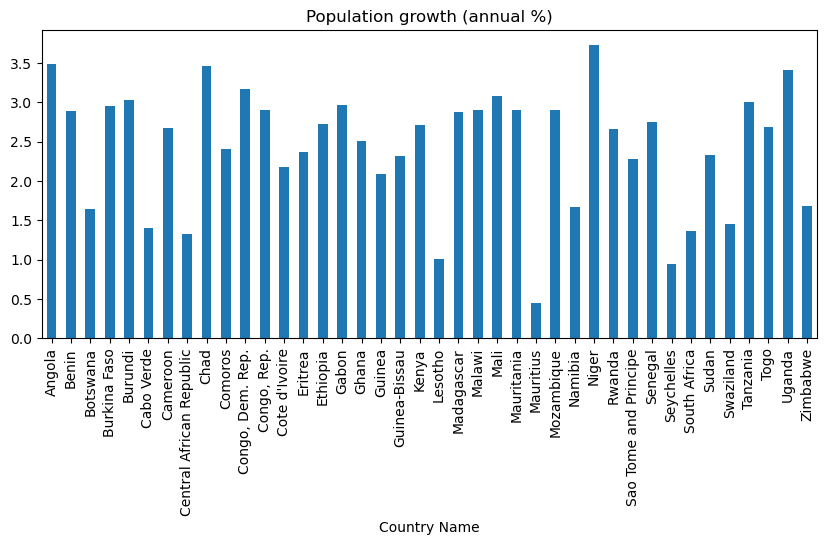

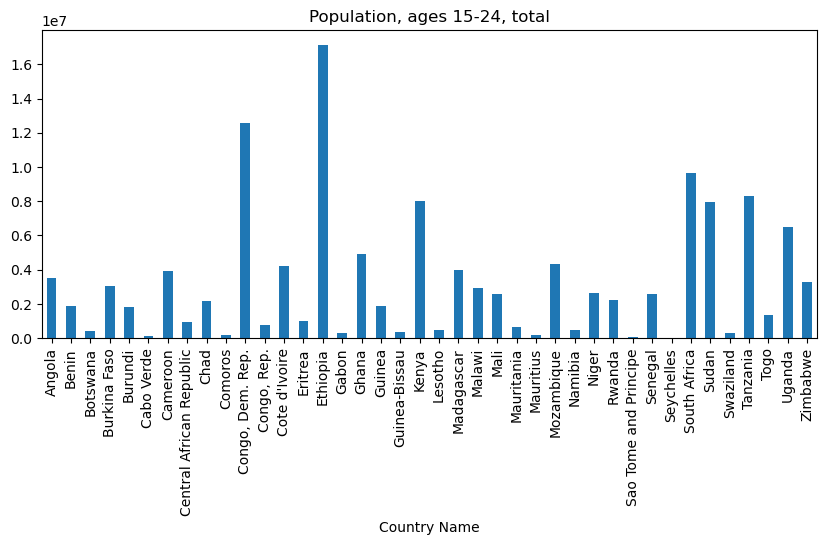

In [62]:
# Sub-Saharan Africa

Saharan_Africa = Final_df.reset_index().loc[Final_df.reset_index()['Region'] == 'Sub-Saharan Africa']
Saharan_Africa_grp= Saharan_Africa.groupby('Country Name').mean()

Saharan_Africa_ind_list = Saharan_Africa_grp.columns

for col in Saharan_Africa_ind_list:
    Saharan_Africa_grp= Saharan_Africa.groupby('Country Name').mean()
    plt.figure(figsize=(10,4))
    Saharan_Africa_grp[col].plot(kind = 'bar')
    plt.title(col)
    plt.show() 

##### 4.2.2 By region

In [63]:
#summary of indicator statistics by region

Region_grp_desc = Final_df.groupby('Region').describe().transpose()
Region_grp_desc

Region                                                    East Asia & Pacific  \
Indicator Name                                                                  
Enrolment in tertiary education per 100,000 inh... count         2.880000e+02   
                                                   mean          2.991984e+03   
                                                   std           1.900576e+03   
                                                   min           1.812442e+02   
                                                   25%           1.547419e+03   
...                                                                       ...   
Population, ages 15-24, total                      min           1.065200e+04   
                                                   25%           7.721850e+04   
                                                   50%           9.901225e+05   
                                                   75%           6.721774e+06   
                                                   max           4.288421e+07   

Region                                                    Europe & Central Asia  \
Indicator Name                                                                    
Enrolment in tertiary education per 100,000 inh... count           6.560000e+02   
                                                   mean            4.001515e+03   
                                                   std             1.214364e+03   
                                                   min             4.054312e+02   
                                                   25%             3.298307e+03   
...                                                                         ...   
Population, ages 15-24, total                      min             4.271200e+04   
                                                   25%             5.810105e+05   
                                                   50%             1.010120e+06   
                                                   75%             2.001658e+06   
                                                   max             2.469014e+07   

Region                                                    Latin America & Caribbean  \
Indicator Name                                                                        
Enrolment in tertiary education per 100,000 inh... count               4.320000e+02   
                                                   mean                3.070889e+03   
                                                   std                 1.560514e+03   
                                                   min                 6.528968e+02   
                                                   25%                 1.878816e+03   
...                                                                             ...   
Population, ages 15-24, total                      min                 7.490000e+03   
                                                   25%                 6.373175e+04   
                                                   50%                 1.273994e+06   
                                                   75%                 2.885825e+06   
                                                   max                 3.544850e+07   

Region                                                    Middle East & North Africa  \
Indicator Name                                                                         
Enrolment in tertiary education per 100,000 inh... count                2.560000e+02   
                                                   mean                 2.605495e+03   
                                                   std                  1.369790e+03   
                                                   min                  2.629532e+01   
                                                   25%                  1.611799e+03   
...                                                                              ...   
Population, ages 15-24, total 

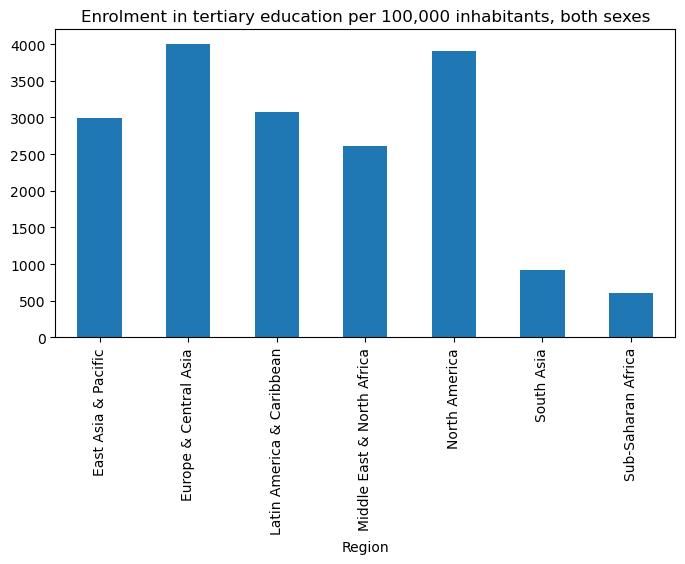

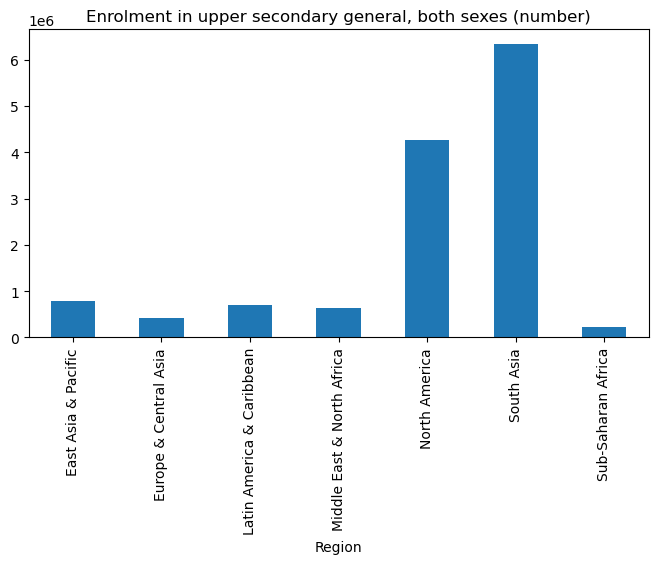

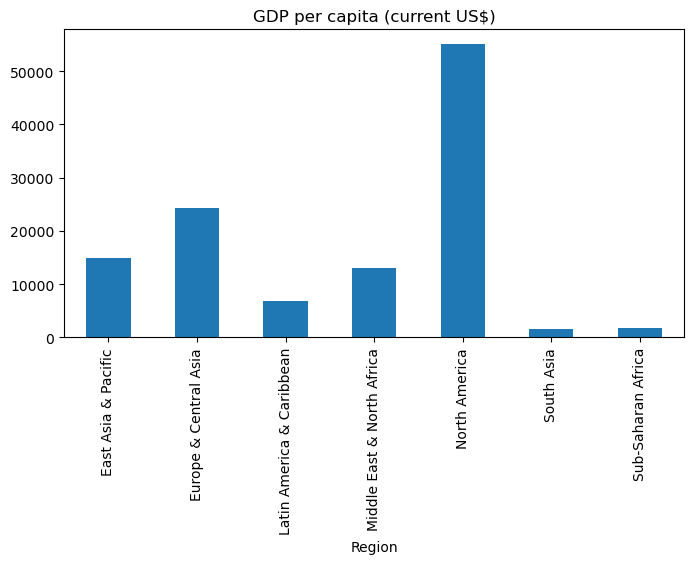

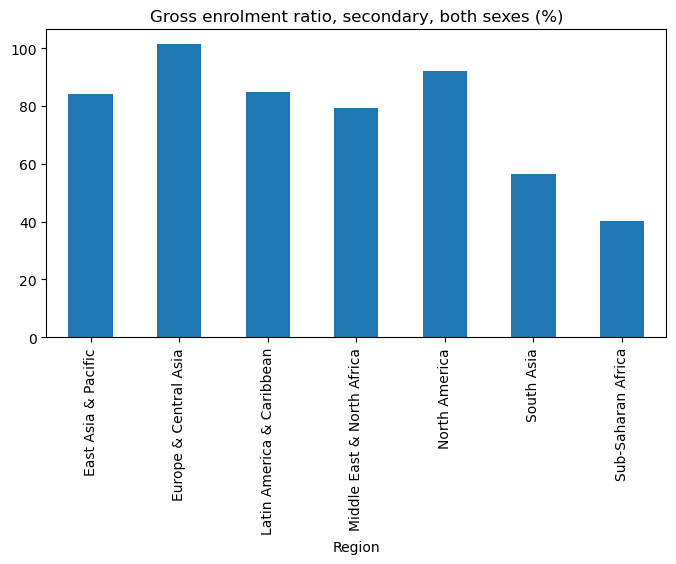

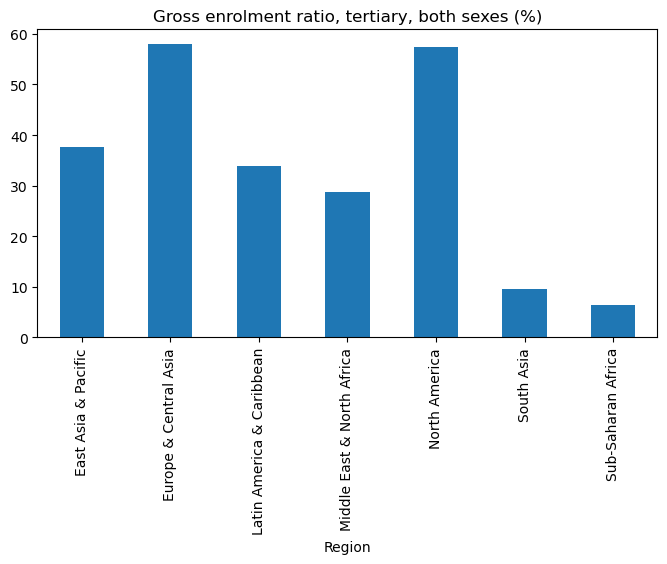

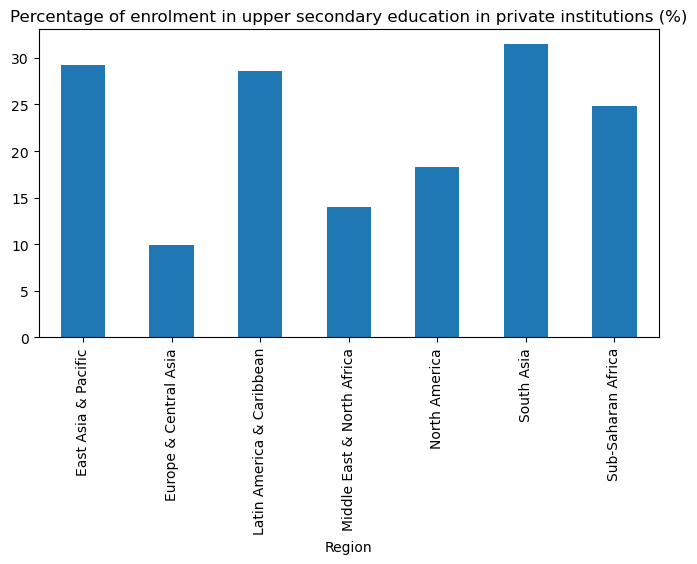

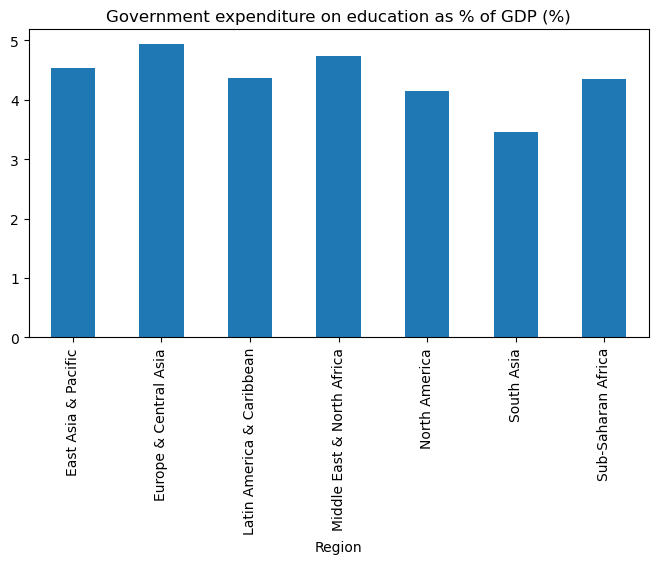

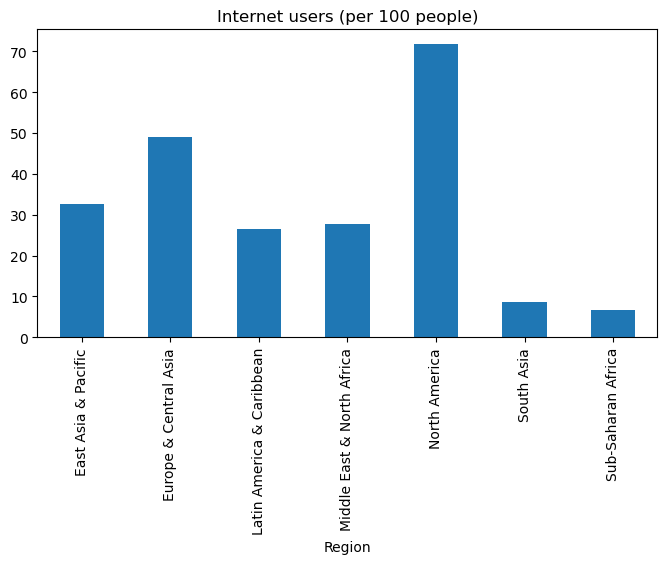

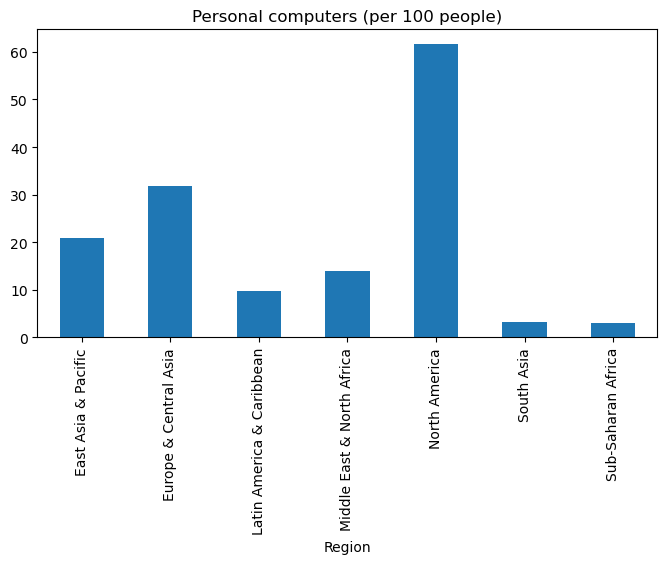

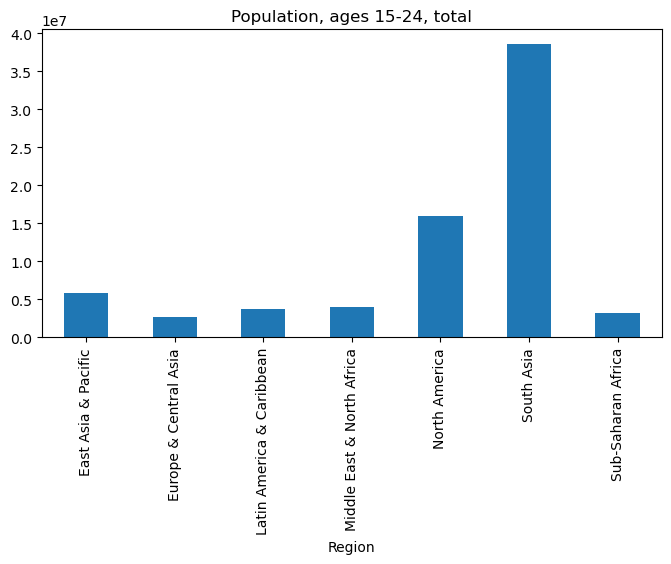

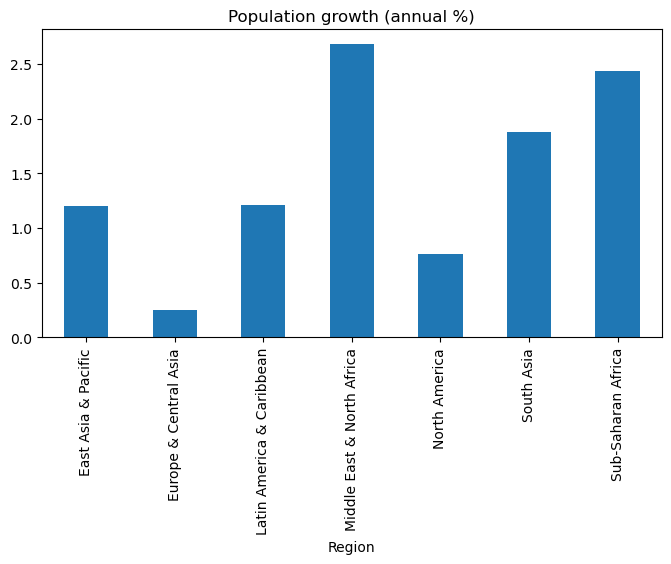

In [64]:
#Indicator statistics by region

indicators_list = ['Enrolment in tertiary education per 100,000 inhabitants, both sexes',
                   'Enrolment in upper secondary general, both sexes (number)',
                   'GDP per capita (current US$)',
                   'Gross enrolment ratio, secondary, both sexes (%)',
                   'Gross enrolment ratio, tertiary, both sexes (%)',
                   'Percentage of enrolment in upper secondary education in private institutions (%)',
                  'Government expenditure on education as % of GDP (%)',
                  'Internet users (per 100 people)',
                  'Personal computers (per 100 people)',
                  'Population, ages 15-24, total',
                  'Population growth (annual %)']

for indicator in indicators_list:
    Region_grp_avg = Final_df.groupby('Region').mean()
    plt.figure(figsize=(8,4))
    Region_grp_avg[indicator].plot(kind='bar')
    plt.title(indicator)
    plt.show()

#### 4.3 Bivariate plots of 2015 data set
 - correlations and relationships between the indicators

##### 4.3.1 Evolution of indicators with year by region

In [65]:
# Filter dataset for 2015

Final_df_2015 = Final_df.reset_index().loc[Final_df.reset_index()['Year'] == '2015'].drop('Year', axis = 1)
Final_df_2015

Indicator Name         Country Name                      Region  \
15                      Afghanistan                  South Asia   
31                          Albania       Europe & Central Asia   
47                          Algeria  Middle East & North Africa   
63                           Angola          Sub-Saharan Africa   
79              Antigua and Barbuda   Latin America & Caribbean   
...                             ...                         ...   
2383                        Vanuatu         East Asia & Pacific   
2399                  Venezuela, RB   Latin America & Caribbean   
2415             West Bank and Gaza  Middle East & North Africa   
2431                    Yemen, Rep.  Middle East & North Africa   
2447                       Zimbabwe          Sub-Saharan Africa   

Indicator Name  Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
15                                                     831.156250                     
31                                                    6015.172852                     
47                                                    3198.919434                     
63                                                     932.604553                     
79                                                    2011.923340                     
...                                                           ...                     
2383                                                   467.807037                     
2399                                                  7433.979492                     
2415                                                  4710.088379                     
2431                                                  1103.770020                     
2447                                                   631.725220                     

Indicator Name  Enrolment in upper secondary general, both sexes (number)  \
15                                                       943750.0           
31                                                       125256.0           
47                                                      1508964.0           
63                                                        80833.0           
79                                                         2615.0           
...                                                           ...           
2383                                                       3706.0           
2399                                                     758969.0           
2415                                                     139338.0           
2431                                                     690326.0           
2447                                                     490522.0           

Indicator Name  GDP per capita (current US$)  \
15                                569.577923   
31                               3934.895394   
47                               4160.220067   
63                               3695.793748   
79                              13659.147914   
...                                      ...   
2383                             2805.834140   
2399                            15692.412878   
2415                             2865.805109   
2431                             1401.903319   
2447                             1033.415842   

Indicator Name  Government expenditure on education as % of GDP (%)  \
15                                                        3.31754     
31                                                        3.53944     
47                                                        4.35425     
63                                                        3.47623     
79                                                        2.55447     
...                                                           ...     
2383                                                      5.54987     
2399                                                      6.87723     
2415     

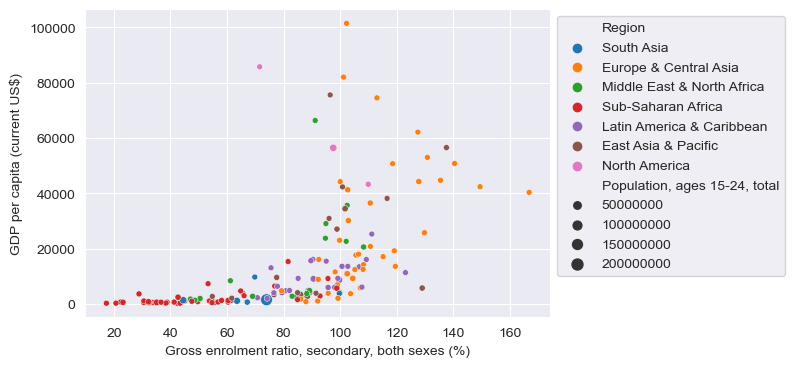

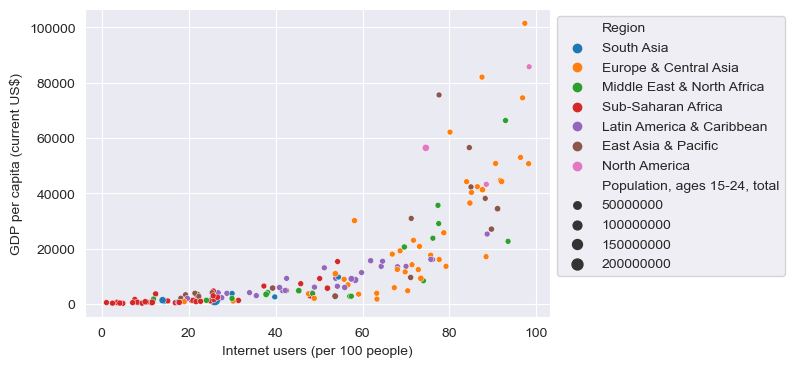

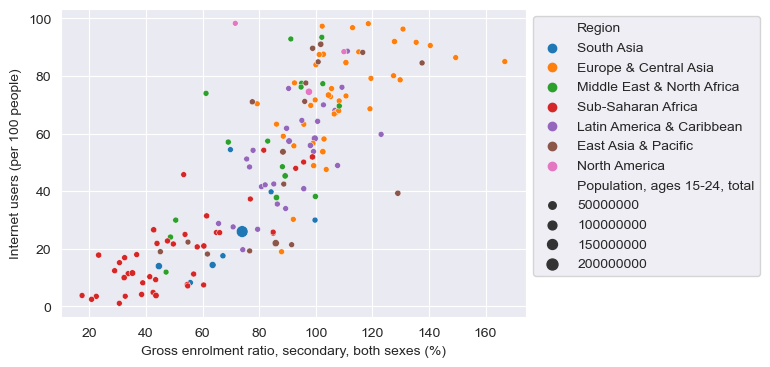

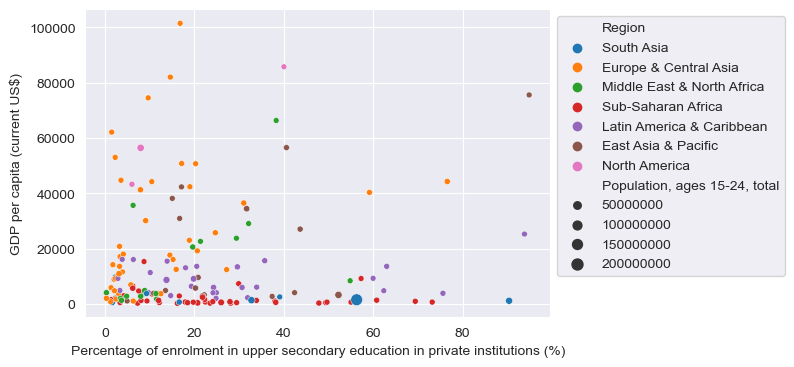

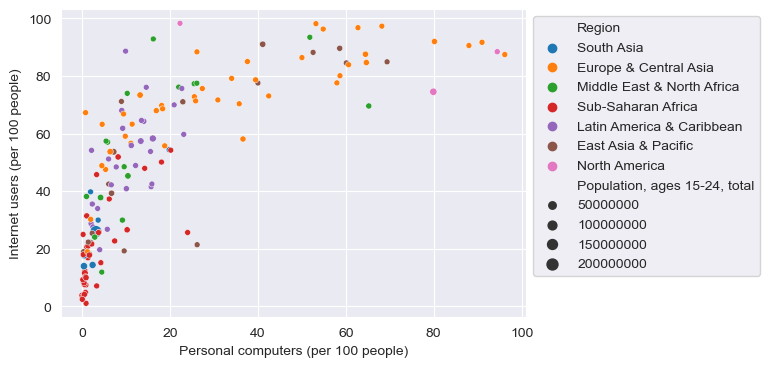

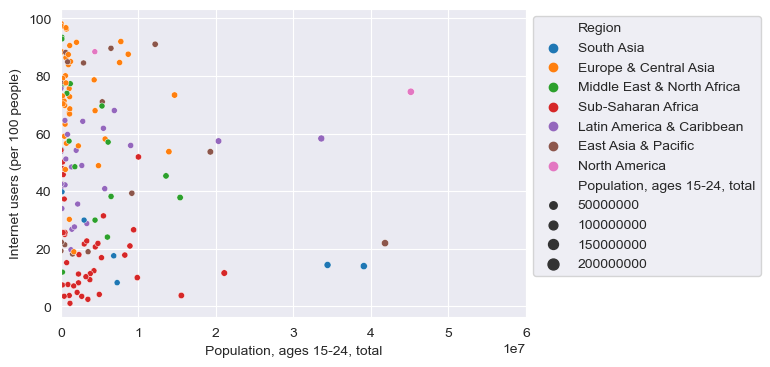

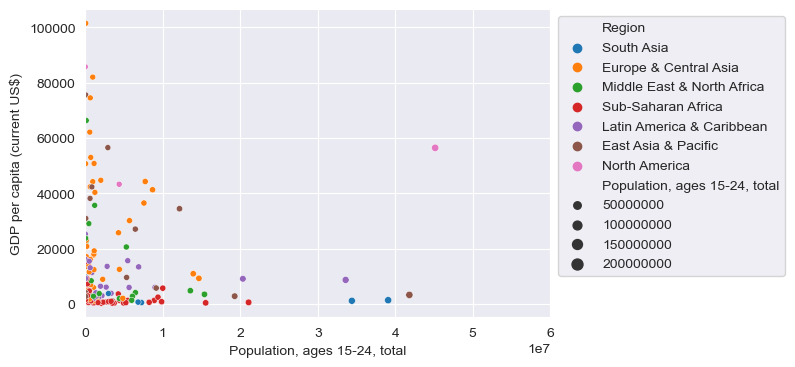

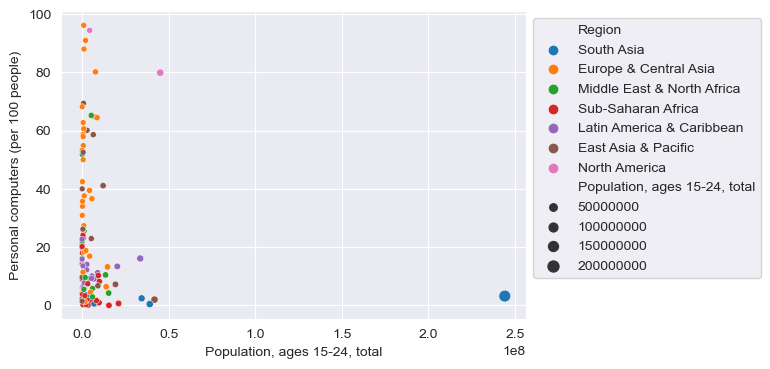

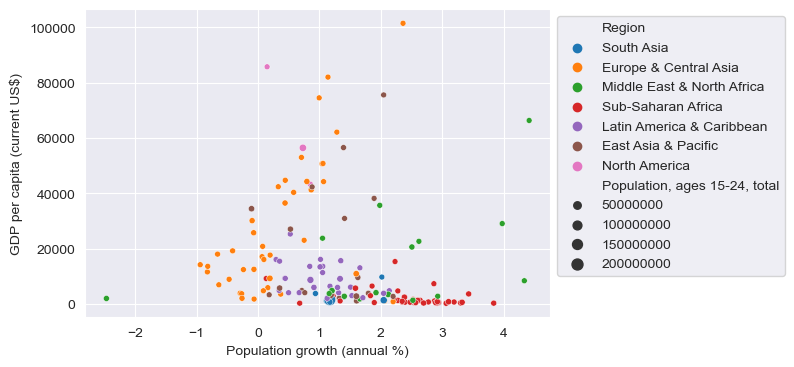

In [66]:
#Bivariate plots of selected indicators according to region

sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Gross enrolment ratio, secondary, both sexes (%)', y = 'GDP per capita (current US$)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks()
plt.yticks()

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Internet users (per 100 people)', y = 'GDP per capita (current US$)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1,1))


plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Gross enrolment ratio, secondary, both sexes (%)', y = 'Internet users (per 100 people)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1,1))

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Percentage of enrolment in upper secondary education in private institutions (%)', y = 'GDP per capita (current US$)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1,1))


plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Personal computers (per 100 people)', y = 'Internet users (per 100 people)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1,1))

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Population, ages 15-24, total', y = 'Internet users (per 100 people)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1.52,1))
plt.xlim(0.0*1e8,0.6*1e8)

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Population, ages 15-24, total', y = 'GDP per capita (current US$)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1.52,1))
plt.xlim(0.0*1e8,0.6*1e8)

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Population, ages 15-24, total', y = 'Personal computers (per 100 people)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1.52,1))
#plt.xlim(0.0*1e8,1.0*1e8)

plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Population growth (annual %)', y = 'GDP per capita (current US$)', hue = 'Region', data = Final_df_2015, size = 'Population, ages 15-24, total')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

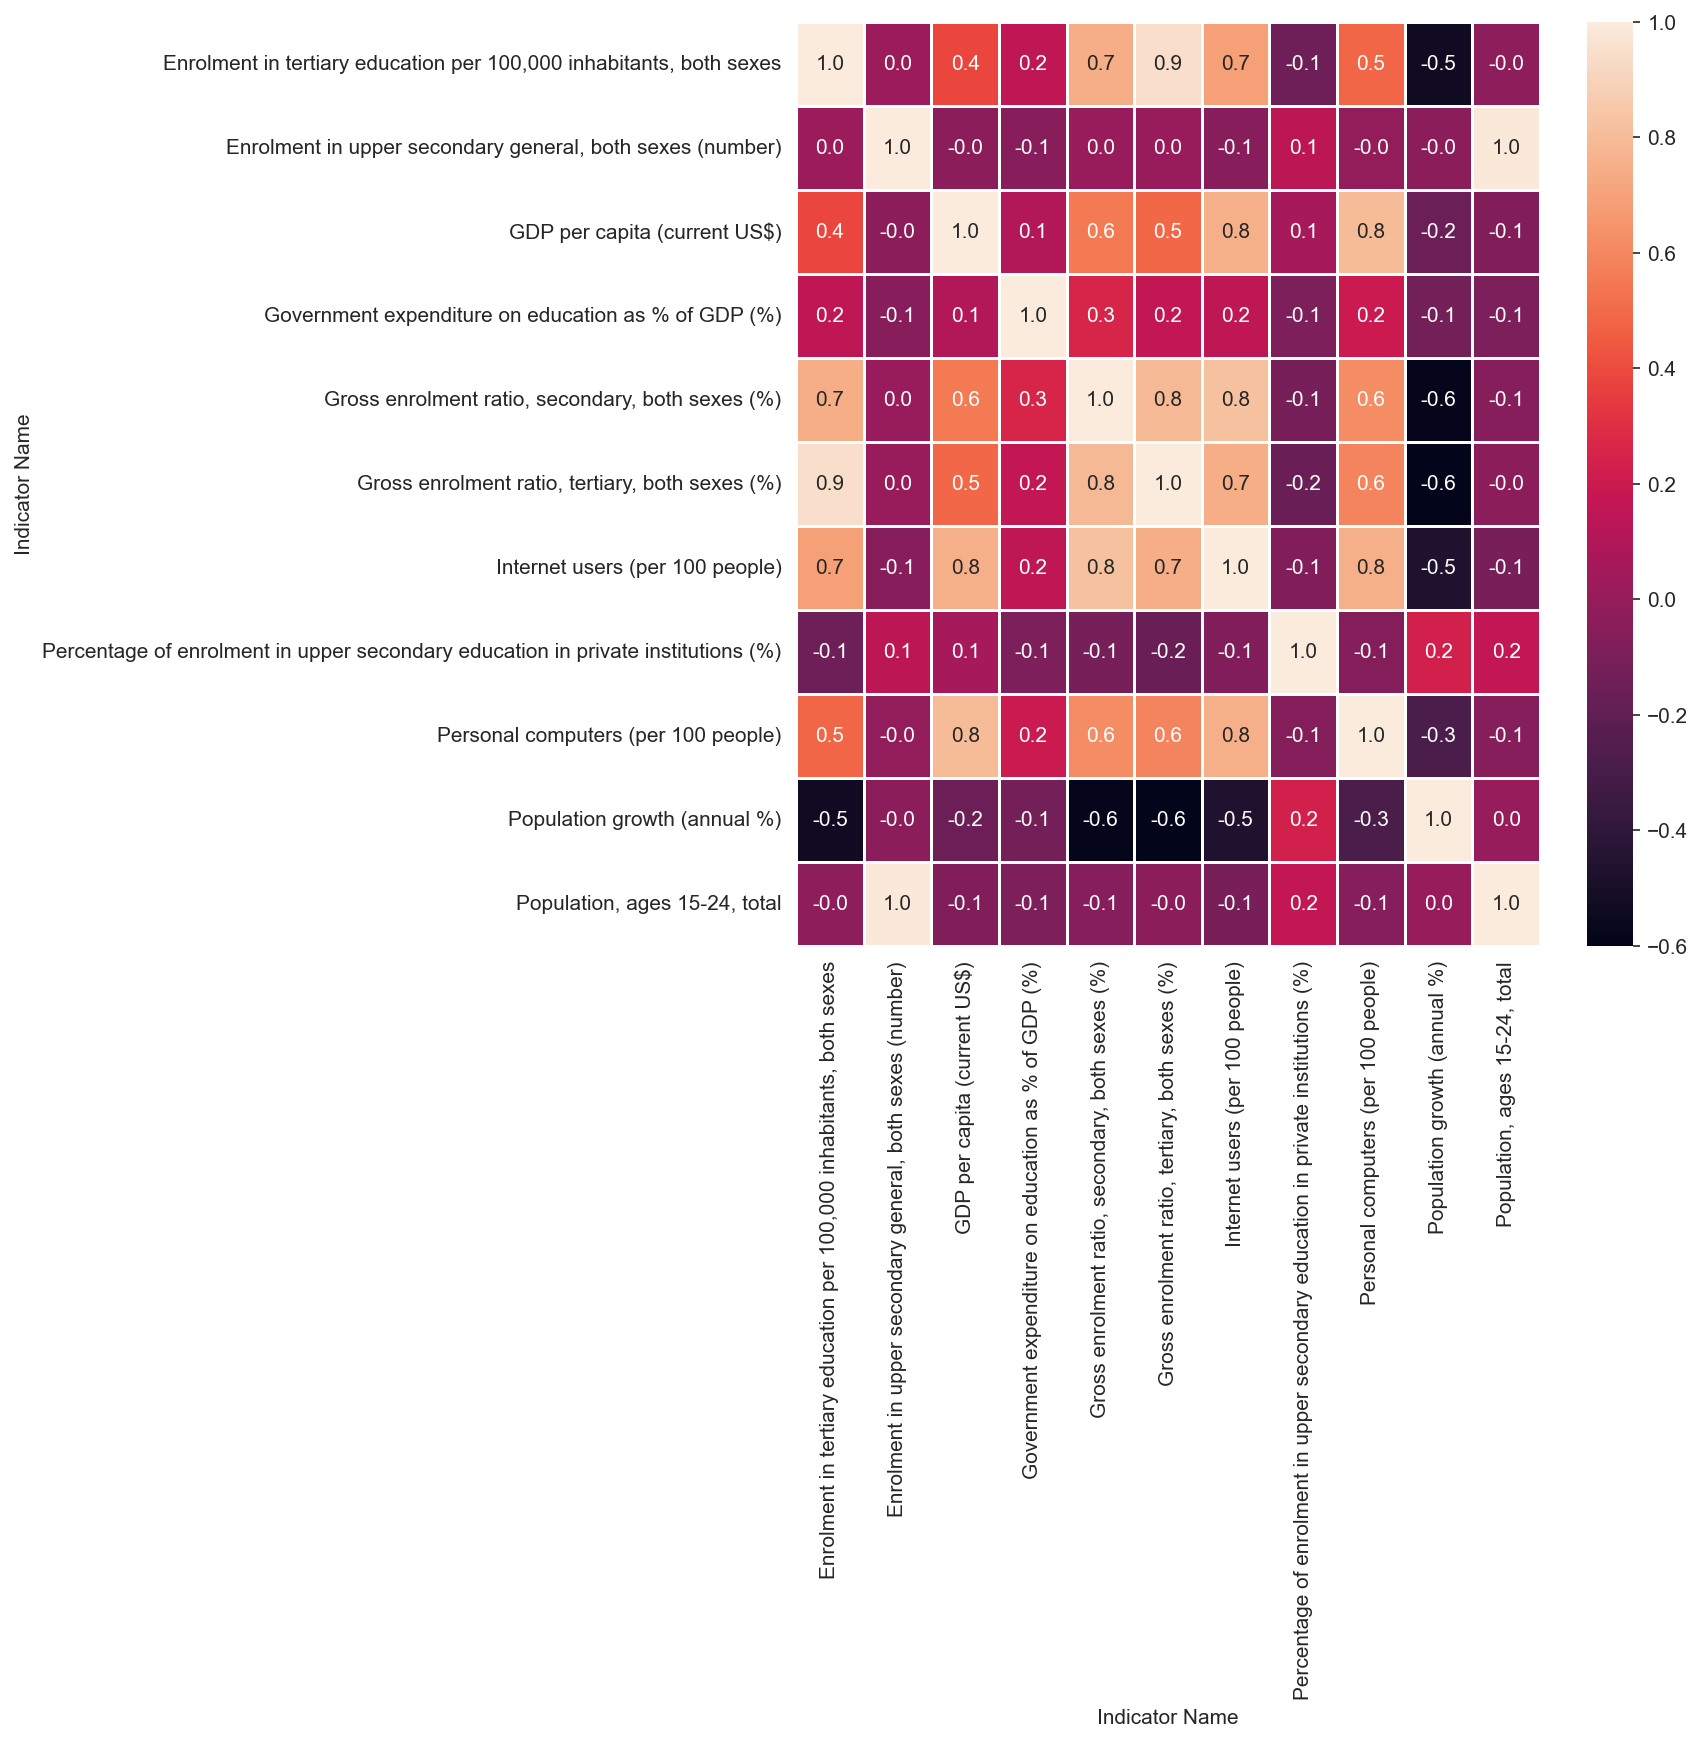

In [67]:
# correlation map between the indicators

f, ax = plt.subplots(figsize=(8, 8), dpi = 150)

sns.heatmap(Final_df_2015.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### 4.4 Multivariate Analysis
- Principal Component Analysis (Scoring)

In [68]:
# Standardized the data before performing PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Reduce the N columns to n principal components with sklearn to perfom PCA
from sklearn.decomposition import PCA

In [69]:
# separating the quantitative indicators

Final_2015 = Final_df_2015.drop(['Country Name','Region'], axis = 1)

scaled_Final = scaler.fit_transform(Final_2015)  

In [70]:
scaled_Final.shape

(153, 11)

In [71]:
columns = Final_2015.columns #
Scale_F = Final_2015.loc[:, columns].values

# Standardizing the columns
Scale_F = StandardScaler().fit_transform(Scale_F)
Scale_F_df = pd.DataFrame(Scale_F, columns = columns)

In [72]:
# reduce the 11 indicators to two principal components
pca = PCA(n_components=2) 

# create the 2 principal components (PC)
PC_final = pca.fit_transform(Scale_F)

#Create dataframe for the 2 PCs 

PC_Df = pd.DataFrame(PC_final, columns = ['PC1','PC2']) 
PC_Df

PC1       PC2
0   -2.753400 -0.311881
1    1.295880 -0.159465
2   -0.410032 -0.097638
3   -3.113436 -0.517278
4    0.164189 -0.290836
..        ...       ...
148 -2.427135 -0.453594
149  1.732543  0.172923
150 -0.337785 -0.318725
151 -2.274867 -0.433801
152 -2.353989 -0.105954

[153 rows x 2 columns]

In [73]:
Country_ID =  Final_df_2015['Country Name'].unique()
Country_DF = pd.DataFrame(Country_ID, columns = ['Country Name']) # create a country dataframe

# create a country and region dataframe from the final_df_2015 dataframe
DF_Country_Region = Final_df_2015[['Country Name','Region']] 

In [74]:
#Concanate the list of countries with PC1 and PC2 dfs

PC_Df_Con = pd.concat([Country_DF, PC_Df], axis = 1) 
PC_Df_Con

Country Name       PC1       PC2
0            Afghanistan -2.753400 -0.311881
1                Albania  1.295880 -0.159465
2                Algeria -0.410032 -0.097638
3                 Angola -3.113436 -0.517278
4    Antigua and Barbuda  0.164189 -0.290836
..                   ...       ...       ...
148              Vanuatu -2.427135 -0.453594
149        Venezuela, RB  1.732543  0.172923
150   West Bank and Gaza -0.337785 -0.318725
151          Yemen, Rep. -2.274867 -0.433801
152             Zimbabwe -2.353989 -0.105954

[153 rows x 3 columns]

In [75]:
#Merge PC_Df_Con with region df to create final DF

Final_PCA_df = pd.merge(DF_Country_Region, PC_Df_Con, on = 'Country Name') 
Final_PCA_df

Country Name                      Region       PC1       PC2
0            Afghanistan                  South Asia -2.753400 -0.311881
1                Albania       Europe & Central Asia  1.295880 -0.159465
2                Algeria  Middle East & North Africa -0.410032 -0.097638
3                 Angola          Sub-Saharan Africa -3.113436 -0.517278
4    Antigua and Barbuda   Latin America & Caribbean  0.164189 -0.290836
..                   ...                         ...       ...       ...
148              Vanuatu         East Asia & Pacific -2.427135 -0.453594
149        Venezuela, RB   Latin America & Caribbean  1.732543  0.172923
150   West Bank and Gaza  Middle East & North Africa -0.337785 -0.318725
151          Yemen, Rep.  Middle East & North Africa -2.274867 -0.433801
152             Zimbabwe          Sub-Saharan Africa -2.353989 -0.105954

[153 rows x 4 columns]

In [76]:
#separate the region column
Region_lt = Final_PCA_df['Region'] 

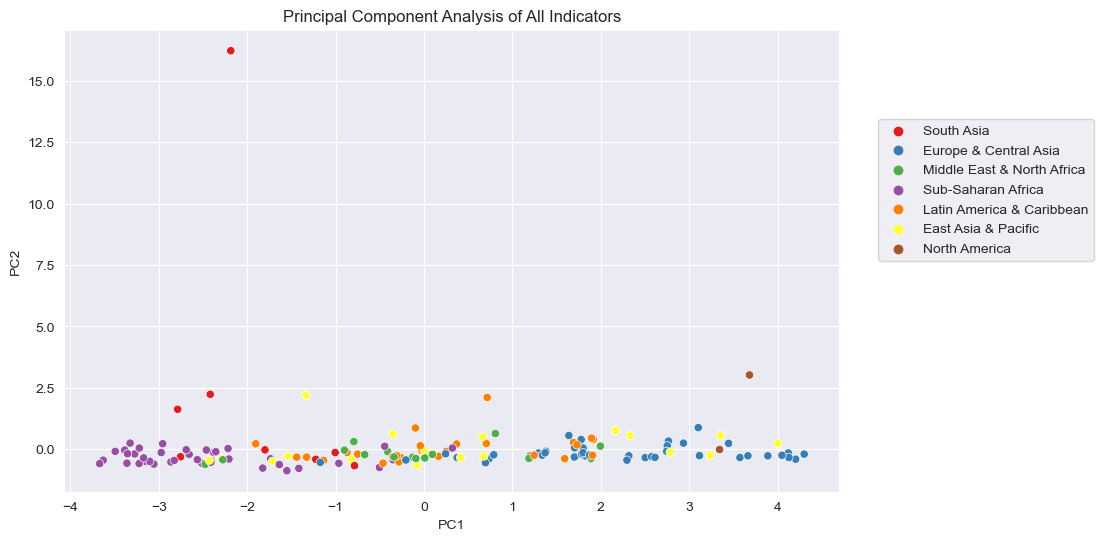

In [77]:
plt.figure(figsize=(10,6), dpi = 100)
sns.scatterplot(x = 'PC1',y = 'PC2',palette='Set1', data = PC_Df, hue = Region_lt)
plt.legend(loc=(1.05,0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis of All Indicators")
plt.show()

In [78]:
#calculate explained variance to know how much variation can be attributed to each of the principal components 
pca.explained_variance_ratio_

array([0.43762811, 0.18500416])

In [79]:
# amount of variance by the 2 components
np.sum(pca.explained_variance_ratio_) 

0.6226322694253332

In [80]:
#Divide the indicators into three distinct groups 

#Group 1  - Population

Pop_indicators = ['Country Name', 'Region','Enrolment in tertiary education per 100,000 inhabitants, both sexes',
                'Enrolment in upper secondary general, both sexes (number)',
                  'Gross enrolment ratio, secondary, both sexes (%)','Gross enrolment ratio, tertiary, both sexes (%)',
                  'Percentage of enrolment in upper secondary education in private institutions (%)',
                   'Population growth (annual %)','Population, ages 15-24, total']

Population_grp = Final_df_2015[Pop_indicators]

#Group 2 - infrastructure

Infrastucture_grp = Final_df_2015[['Internet users (per 100 people)','Personal computers (per 100 people)']]

#Group 3 - wealth

Wealth_grp = Final_df_2015[['GDP per capita (current US$)','Government expenditure on education as % of GDP (%)']]

In [81]:
## seperate the indicator variables of the population group

#Group 1

Population_grp_M = Population_grp.drop(['Country Name','Region'], axis = 1) 
# Transform and create arrays of population group dataframe into 7 components

scaled_Pop = scaler.fit_transform(Population_grp_M) # transform and fit the population group dataframe into 7 PC 
scaled_Pop

array([[-1.10934533, -0.02105224, -0.93923911, ..., -1.00698818,
         1.34277603,  0.06468667],
       [ 1.65874843, -0.2019288 ,  0.43165745, ..., -0.50089956,
        -1.43335687, -0.25765645],
       [ 0.15496206,  0.10385273,  0.57156932, ..., -1.07085693,
         0.46449482,  0.02690154],
       ...,
       [ 0.9618764 , -0.19881686, -0.0046551 , ..., -0.84878791,
         1.32686009, -0.23374564],
       [-0.96377857, -0.07705565, -1.1790968 , ..., -0.90527024,
         0.97973047,  0.00417507],
       [-1.21583491, -0.12120975, -1.21512698, ...,  2.31716665,
         0.82986107, -0.12396142]])

In [82]:
# check the number of rows and columns
scaled_Pop.shape 

(153, 7)

In [83]:
#check if the normalized Population_grp indicators has a mean of zero and a standard deviation of one.

np.mean(scaled_Pop),np.std(scaled_Pop)

(-3.648912275145239e-17, 1.0)

In [84]:
#create arrays of population in 1-PCA component

pca_population = PCA(n_components=1)
PC_population = pca_population.fit_transform(scaled_Pop) 

#create 1-PCA dataframe of the population indicators

PC_population_Df = pd.DataFrame(PC_population, columns = ['Population'])

In [85]:
# Group 2

scaled_Infra = scaler.fit_transform(Infrastucture_grp)
pca_Infrastructure = PCA(n_components=1)

#create arrays of population in 1-PCA component

PC_Infrastructure = pca_Infrastructure.fit_transform(scaled_Infra)

#create 1-PCA dataframe of the infrastructure indicators

PC_Infrastructure_Df = pd.DataFrame(PC_Infrastructure, columns = ['Infrastructure'])

In [86]:
# Group 3

scaled_Eco = scaler.fit_transform(Wealth_grp)
pca_Wealth = PCA(n_components=1)
PC_Wealth = pca_Wealth.fit_transform(scaled_Eco)
PC_Wealth_Df = pd.DataFrame(PC_Wealth, columns = ['Wealth']) # build a dataframe

In [87]:
# Concatenate the population, infrastructure, and economic dataframes

All_DF_PCA = pd.concat([PC_Wealth_Df, PC_Infrastructure_Df, PC_population_Df], axis = 1)
All_DF_PCA

Wealth  Infrastructure  Population
0   -1.038039       -1.561030   -2.025917
1   -0.831926       -0.065123    2.117980
2   -0.508678       -0.797253    0.280609
3   -0.864923       -1.450276   -2.669870
4   -0.865403        0.605713   -0.063268
..        ...             ...         ...
148 -0.094579       -1.178775   -2.187447
149  0.879447        0.043914    1.971481
150 -1.727788       -0.182811    0.168571
151 -0.300431       -1.090472   -1.902810
152  0.955943       -0.984714   -2.496847

[153 rows x 3 columns]

In [88]:
# Normalization of each indicator group between 0 and 1 interval

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = All_DF_PCA.columns #select column titles

d = scaler.fit_transform(All_DF_PCA)
Normalized_All_DF_PCA = pd.DataFrame(d, columns=names)
Normalized_All_DF_PCA

Wealth  Infrastructure  Population
0    0.162591        0.031886    0.204390
1    0.203570        0.326702    0.799787
2    0.267838        0.182413    0.535793
3    0.197010        0.053714    0.111866
4    0.196914        0.458912    0.486384
..        ...             ...         ...
148  0.350169        0.107222    0.181181
149  0.543825        0.348191    0.778738
150  0.025455        0.303508    0.519695
151  0.309242        0.124625    0.222078
152  0.559033        0.145468    0.136726

[153 rows x 3 columns]

In [89]:
Final_scaled = scaler.fit_transform(Normalized_All_DF_PCA)
pca_Final_All = PCA(n_components=1)
PC_Final_All = pca_Final_All.fit_transform(Final_scaled)
PC_Final_All_Df = pd.DataFrame(PC_Final_All, columns = ['PC Score'])
PC_Final_All_Df

PC Score
0   -0.471021
1    0.104748
2   -0.124240
3   -0.497676
4    0.000583
..        ...
148 -0.354087
149  0.252472
150 -0.156943
151 -0.335226
152 -0.265729

[153 rows x 1 columns]

In [90]:
# normalize the PC score between the 0 and 1 interval to get the final ranking score

columns = PC_Final_All_Df.columns #select column titles

Scale_All = scaler.fit_transform(PC_Final_All_Df)
Normalized_PC_Final_All_Df = pd.DataFrame(Scale_All, columns=columns)

In [91]:
# Concatenate the country and the normalized Pc dataframe

Final_DF_PCnormalized = pd.concat([Country_DF, Normalized_PC_Final_All_Df], axis = 1) 

In [92]:
# merge the region, country, and Final_DF_PCnormalized sub-dataframes to create a single DF with all country, region, and score values as columns  

Final_df_Score = pd.merge(DF_Country_Region, Final_DF_PCnormalized, on = 'Country Name') 
Final_df_Score

Country Name                      Region  PC Score
0            Afghanistan                  South Asia  0.087048
1                Albania       Europe & Central Asia  0.500399
2                Algeria  Middle East & North Africa  0.336006
3                 Angola          Sub-Saharan Africa  0.067913
4    Antigua and Barbuda   Latin America & Caribbean  0.425618
..                   ...                         ...       ...
148              Vanuatu         East Asia & Pacific  0.170997
149        Venezuela, RB   Latin America & Caribbean  0.606451
150   West Bank and Gaza  Middle East & North Africa  0.312529
151          Yemen, Rep.  Middle East & North Africa  0.184537
152             Zimbabwe          Sub-Saharan Africa  0.234430

[153 rows x 3 columns]

In [93]:
# Top 10 countries with high potential of customers

#Arrange the scores in a descennding order, that is, from the maximum to the minimum

Final_df_Score.sort_values('PC Score', inplace = True, ascending = False) 

# display the top 10 ranked countries in a dataframe

High_potential_countries = Final_df_Score.head(10)
High_potential_countries

Country Name                 Region  PC Score
134         Sweden  Europe & Central Asia  1.000000
108         Norway  Europe & Central Asia  0.990765
42         Denmark  Europe & Central Asia  0.988622
104    Netherlands  Europe & Central Asia  0.986201
135    Switzerland  Europe & Central Asia  0.960673
67         Iceland  Europe & Central Asia  0.942971
52         Finland  Europe & Central Asia  0.923432
146  United States          North America  0.911164
29          Canada          North America  0.905188
8        Australia    East Asia & Pacific  0.899557

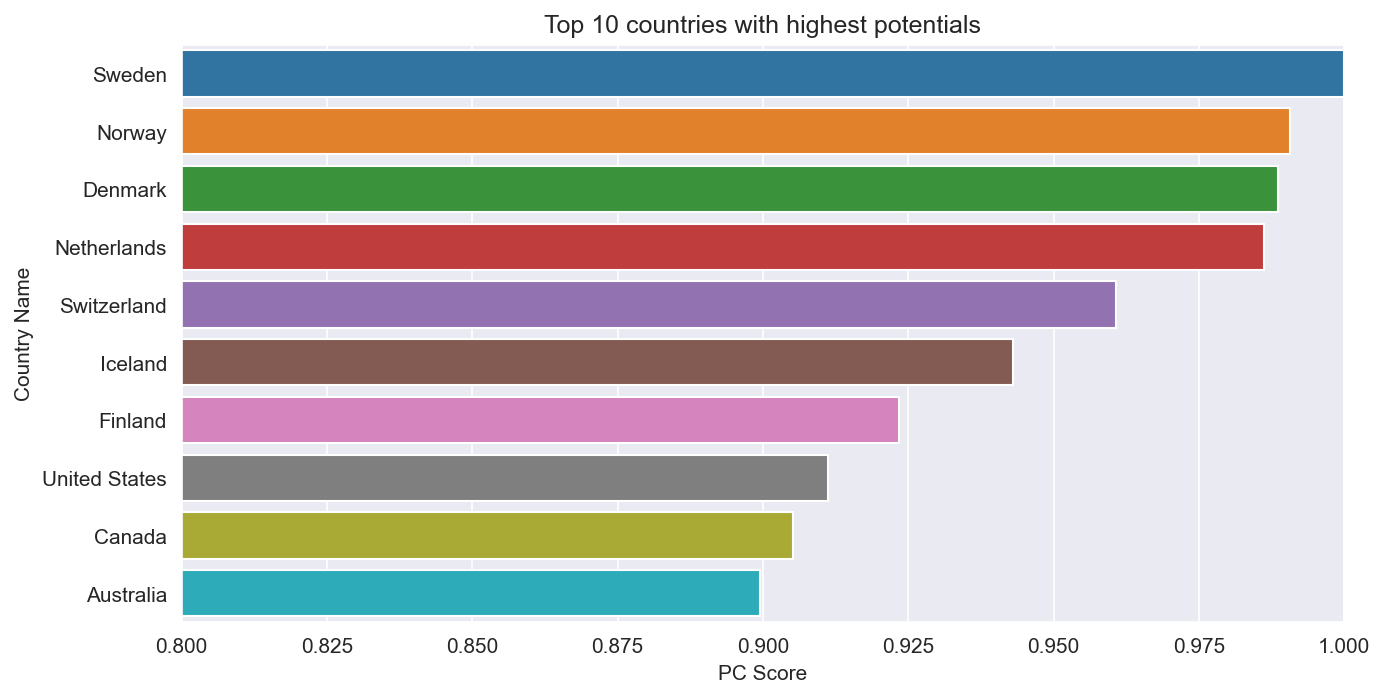

In [94]:
plt.figure(figsize=(10,5), dpi = 150)
sns.barplot(x= 'PC Score', y = 'Country Name', data = High_potential_countries)
plt.xlabel('PC Score')
plt.ylabel('Country Name')
plt.xlim(0.8, 1.0)
plt.title('Top 10 countries with highest potentials')
plt.show()

In [95]:
High_Country_Lst = High_potential_countries['Country Name'].unique().tolist()

In [96]:
Final_Top_df = Final_df.reset_index().loc[Final_df.reset_index()['Country Name'].isin(High_Country_Lst)]
Final_Top_df

Indicator Name   Country Name  Year               Region  \
128                 Australia  2000  East Asia & Pacific   
129                 Australia  2001  East Asia & Pacific   
130                 Australia  2002  East Asia & Pacific   
131                 Australia  2003  East Asia & Pacific   
132                 Australia  2004  East Asia & Pacific   
...                       ...   ...                  ...   
2347            United States  2011        North America   
2348            United States  2012        North America   
2349            United States  2013        North America   
2350            United States  2014        North America   
2351            United States  2015        North America   

Indicator Name  Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
128                                                   4423.095703                     
129                                                   4498.955566                     
130                                                   5186.994141                     
131                                                   5097.359863                     
132                                                   5018.634766                     
...                                                           ...                     
2347                                                  6727.520508                     
2348                                                  6669.043457                     
2349                                                  6297.812012                     
2350                                                  6166.944824                     
2351                                                  6166.944824                     

Indicator Name  Enrolment in upper secondary general, both sexes (number)  \
128                                                      453326.0           
129                                                      437126.0           
130                                                      451606.0           
131                                                      462877.0           
132                                                      462479.0           
...                                                           ...           
2347                                                   11809382.0           
2348                                                   11748263.0           
2349                                                   11646415.0           
2350                                                   11736315.0           
2351                                                   11736315.0           

Indicator Name  GDP per capita (current US$)  \
128                             21690.920999   
129                             19517.841677   
130                             20081.817626   
131                             23465.385586   
132                             30472.379773   
...                                      ...   
2347                            49790.665478   
2348                            51450.122295   
2349                            52787.026949   
2350                            54598.550689   
2351                            56469.008969   

Indicator Name  Government expenditure on education as % of GDP (%)  \
128                                                       4.89265     
129                                                       4.89265     
130                                                       4.89265     
131                                                       4.89265     
132                                                       4.89265     
...                                                           ...     
2347                                                      5.21150     
2348                                                      5.20087     
2349                                                      4.93013     
2350                  

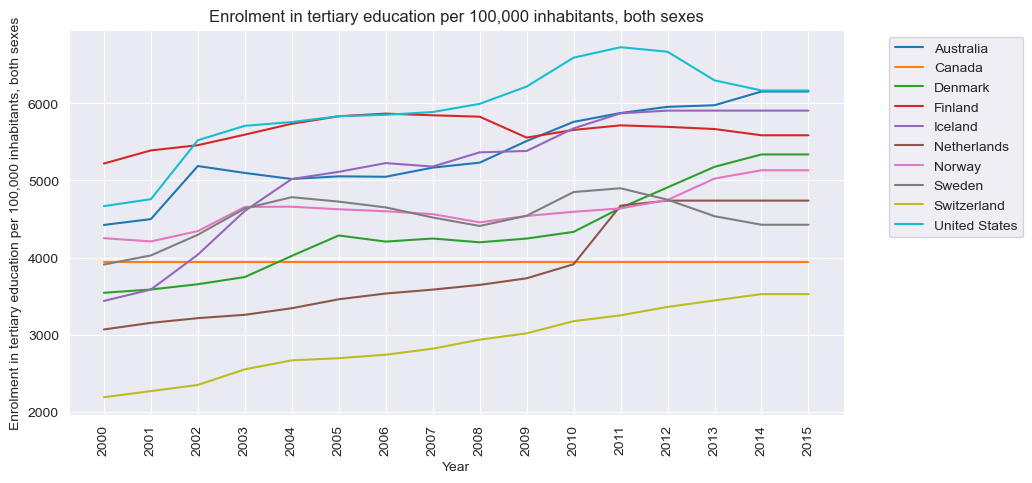

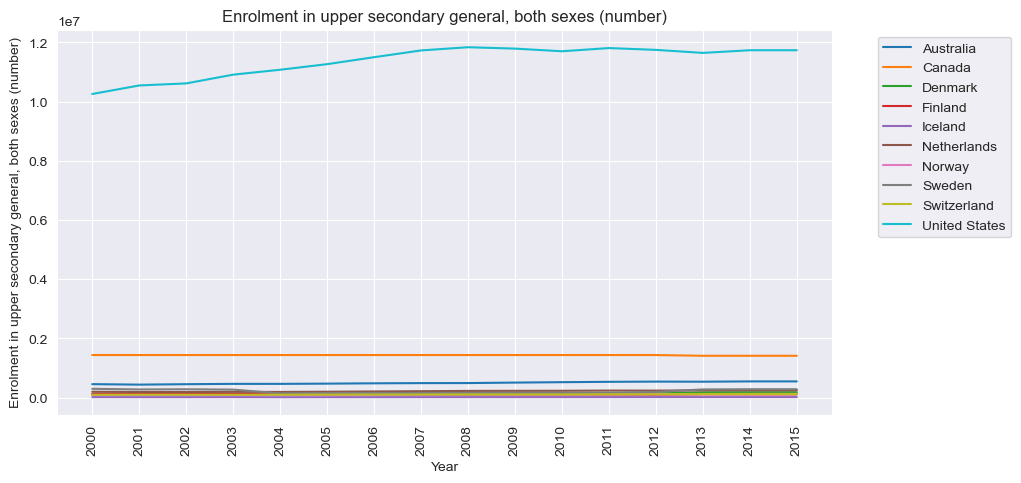

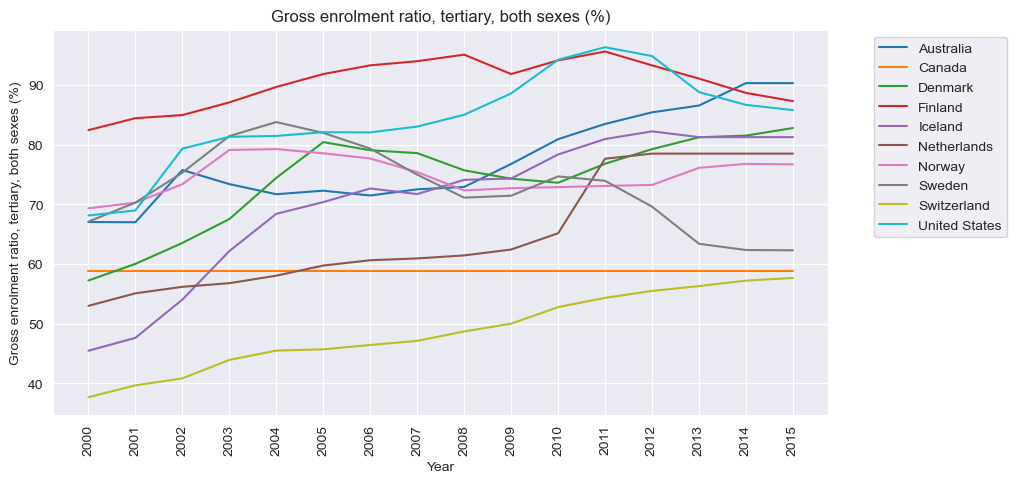

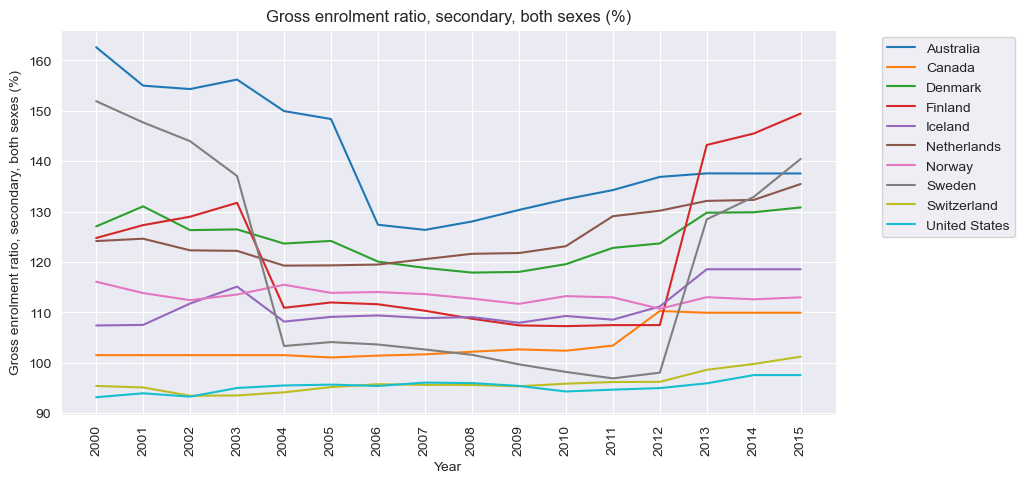

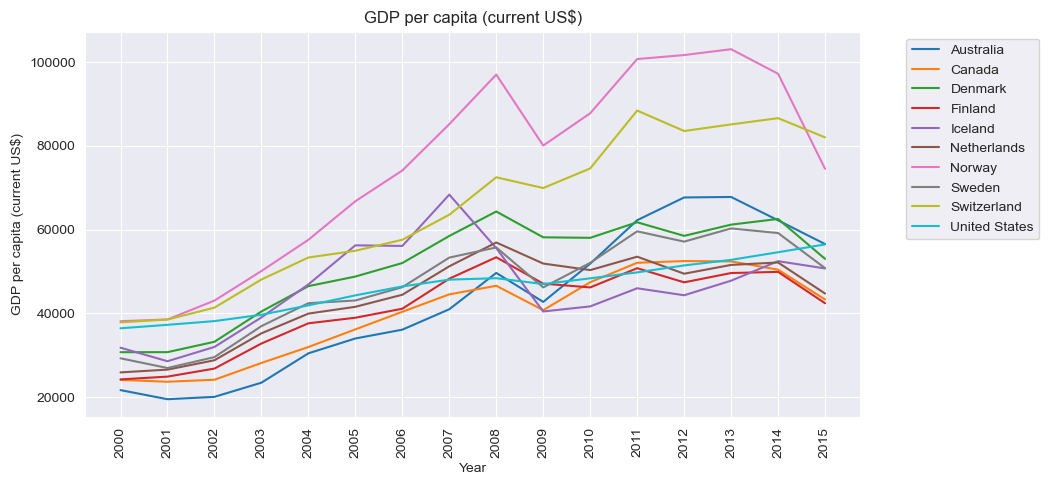

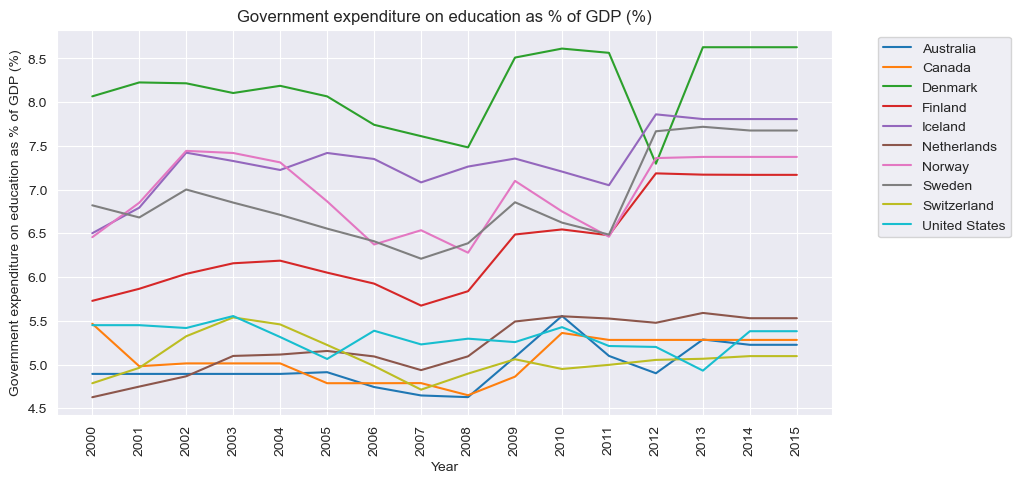

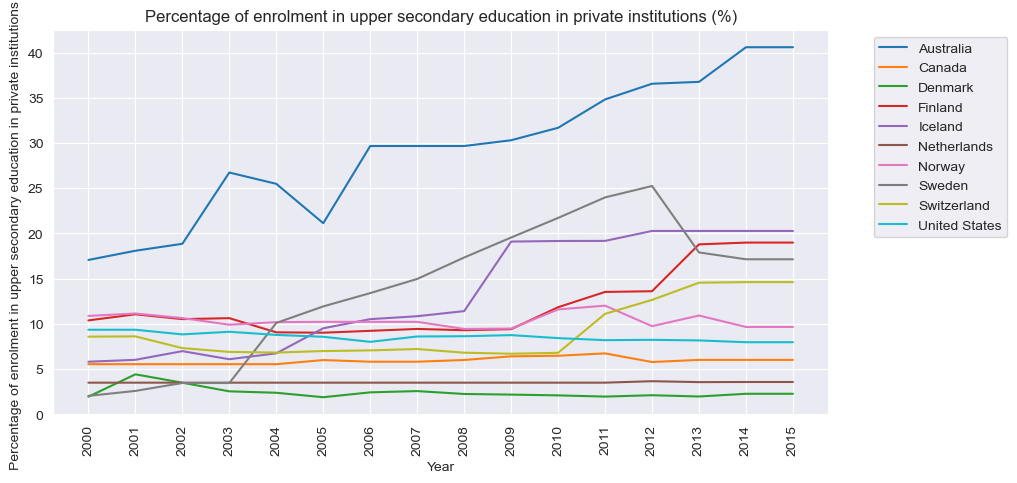

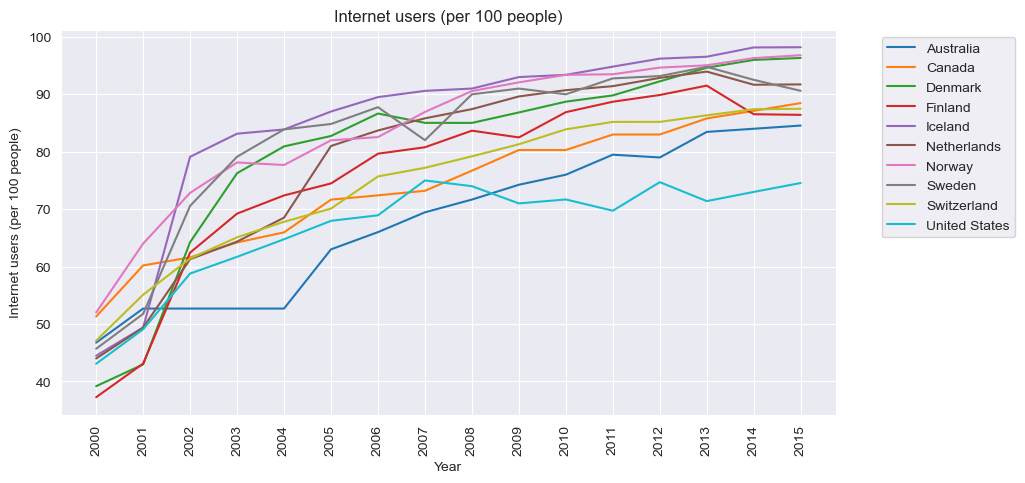

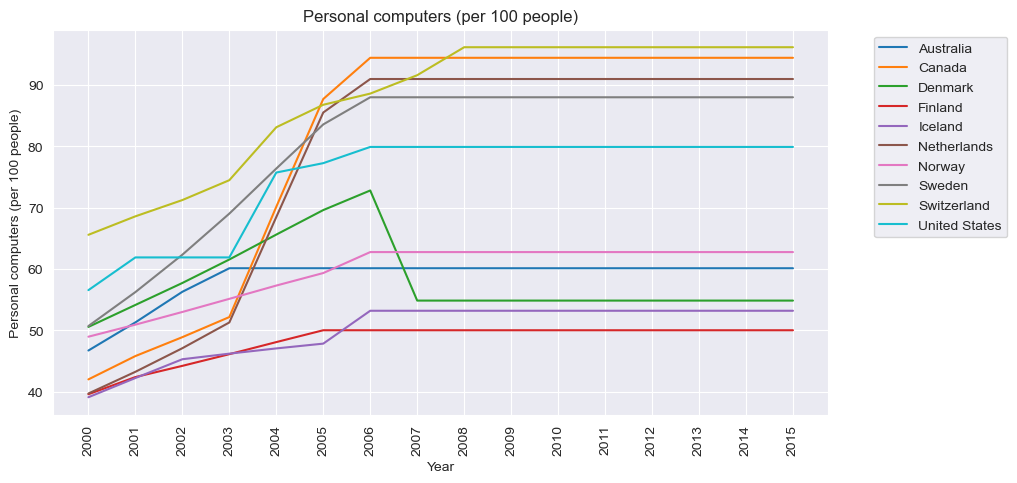

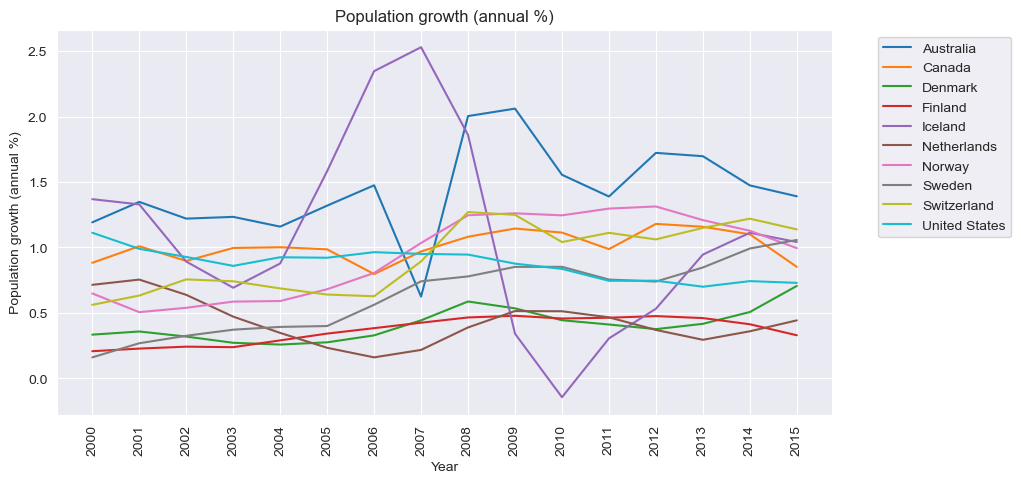

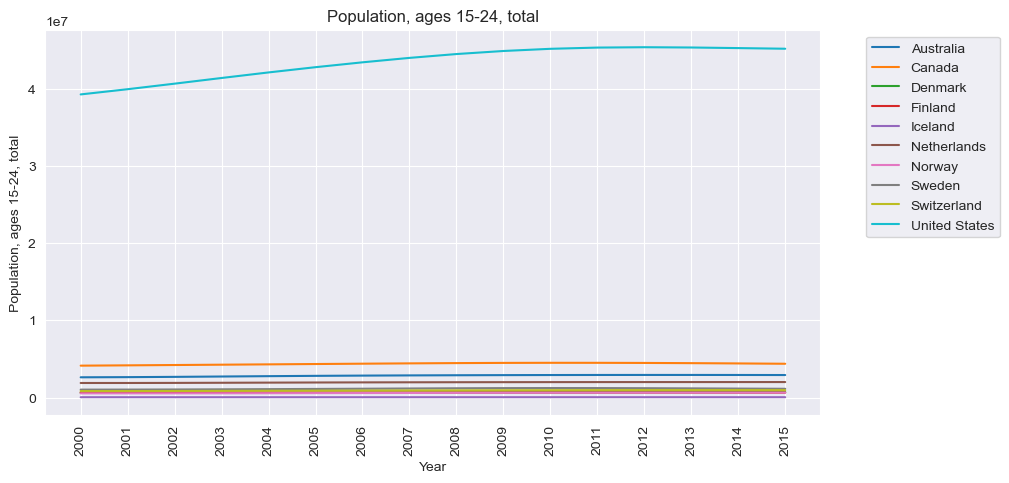

In [97]:
# visualize the evolution of the countries with high potentials
ind_lst = ['Enrolment in tertiary education per 100,000 inhabitants, both sexes',
           'Enrolment in upper secondary general, both sexes (number)',
           'Gross enrolment ratio, tertiary, both sexes (%)',
           'Gross enrolment ratio, secondary, both sexes (%)',
           'GDP per capita (current US$)',
            'Government expenditure on education as % of GDP (%)',
           'Percentage of enrolment in upper secondary education in private institutions (%)',
           'Internet users (per 100 people)',
           'Personal computers (per 100 people)',
           'Population growth (annual %)',
            'Population, ages 15-24, total']

for indicator in ind_lst:
    plt.figure(figsize=(10, 5), dpi = 100)
    sns.lineplot(data = Final_Top_df, x = 'Year', y = indicator, hue = 'Country Name')
    plt.legend(bbox_to_anchor = (1.05,1))
    plt.title(indicator)
    plt.xticks(rotation=90)
    plt.show()

### 5.0 Conclusions

 - There is a moderate to good correlation between the wealth and infrastructure indicators
 - Normalized PCA scores of the indicators show that Europe and Central Asia, North America, and only Australia in East Asia & Pacific are the best regions to expand EdTech  international programs
 - The top countries with highest potential of expansions with good client base and growths are United State, Australia, Denmark, Netherlands, and Switzerland

#### Appendix

In [98]:
# Initial total number of countries per region

I_countries = DF_pivot.reset_index().groupby('Region').count()
I_countries['Numbers'] = I_countries['Country Name']/16 # create new column for number of countries (16 = number of years)

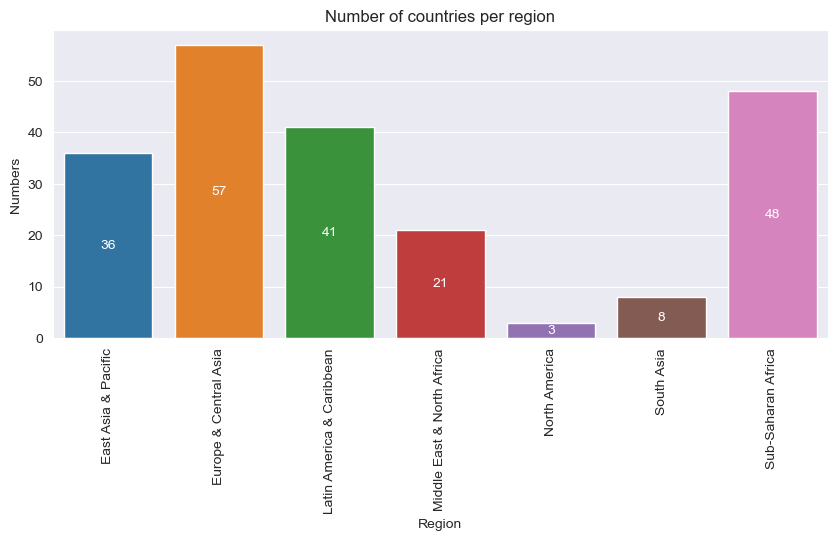

In [99]:
plt.figure(figsize=(10,4))
ax1 = sns.barplot(data=I_countries.reset_index(), x= 'Region', y = 'Numbers')
ax1.bar_label(ax1.containers[0], label_type='center', color='white')
plt.title('Number of countries per region')
plt.xticks(rotation=90)
plt.show()

In [100]:
# Number of countries per region after data cleaning

A_countries = Final_df.reset_index().groupby('Region').count()
A_countries['Numbers'] = A_countries['Country Name']/16 # create new column for number of countries (16 = number of years)

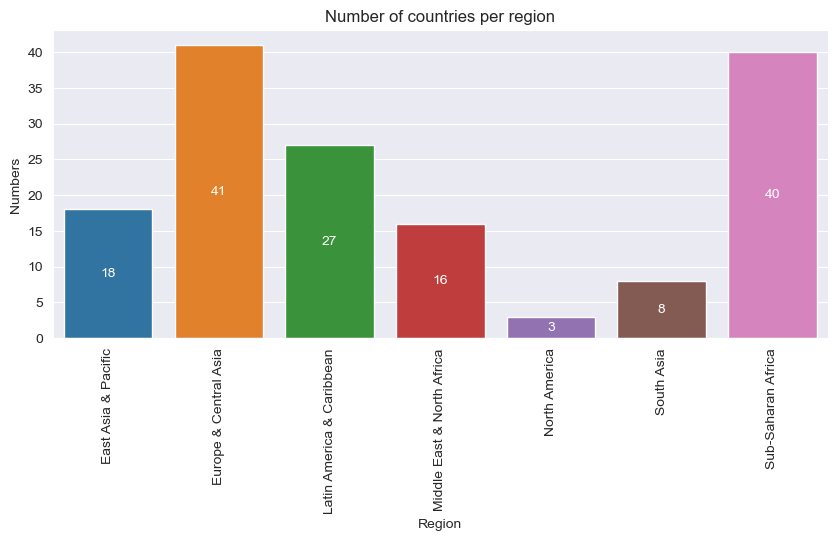

In [101]:
plt.figure(figsize=(10,4))
ax1 = sns.barplot(data=A_countries.reset_index(), x= 'Region', y = 'Numbers')
ax1.bar_label(ax1.containers[0], label_type='center', color='white')
plt.title('Number of countries per region')
plt.xticks(rotation=90)
plt.show()